## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np
import seaborn as sns

# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"seoul_covid19_11_11_.csv"
file_name

'seoul_covid19_11_11_.csv'

In [3]:
# read_csv 로 csv 파일을 불러와 주세요.

df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(6505, 7)

In [4]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by="연번", ascending=False)

In [5]:
# head 로 미리보기를 합니다.

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,6505,27935,11.11.,중구,-,성동구 금호노인요양원 관련,NaN
1,6504,27930,11.11.,중구,-,성동구 금호노인요양원 관련,NaN
2,6503,27936,11.11.,용산구,-,감염경로 조사중,NaN
3,6502,27896,11.11.,타시도,-,성동구 금호노인요양원 관련,NaN
4,6501,27922,11.11.,강동구,-,용산구 국군복지단,NaN


In [6]:
# tail 로 미리보기를 합니다.

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
6500,5,9,1.31.,성북구,-,#5 접촉,퇴원
6501,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
6502,3,6,1.30.,종로구,-,#3 접촉,퇴원
6503,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
6504,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


## 시각화 도구 불러오기

In [7]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

# import matplotlib.pyplot as plt

# # plt.rc("font", family="Malgun Gothic")
# plt.rc("font", family="AppleGothic")
# plt.rc("axes", unicode_minus=False)
# plt.style.use("fivethirtyeight")

# pd.Series([1, 3, 5, -7, 9]).plot.bar(title="한글 제목")

### 시각화 선명하게 설정하기

In [8]:
# # retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

## 확진일

In [9]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df["확진일"].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
3.5.       1
5.17.      1
2.7.       1
5.01.      1
4.20.      1
Name: 확진일, Length: 265, dtype: int64

In [10]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)

0    11.11.
Name: 확진일, dtype: object

In [11]:
"2020-06-30"

'2020-06-30'

In [12]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020-"+ df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]].head()

,확진일,확진일자
0,11.11.,2020-11-11
1,11.11.,2020-11-11
2,11.11.,2020-11-11
3,11.11.,2020-11-11
4,11.11.,2020-11-11


In [13]:
# 월만 추출합니다.

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].tail()

,확진일,확진일자,월
6500,1.31.,2020-01-31,1
6501,1.30.,2020-01-30,1
6502,1.30.,2020-01-30,1
6503,1.30.,2020-01-30,1
6504,1.24.,2020-01-24,1


In [14]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

<ipython-input-14-a4f32d619550>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일자"].dt.week


,확진일,확진일자,월,주
0,11.11.,2020-11-11,11,46
1,11.11.,2020-11-11,11,46
2,11.11.,2020-11-11,11,46
3,11.11.,2020-11-11,11,46
4,11.11.,2020-11-11,11,46


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

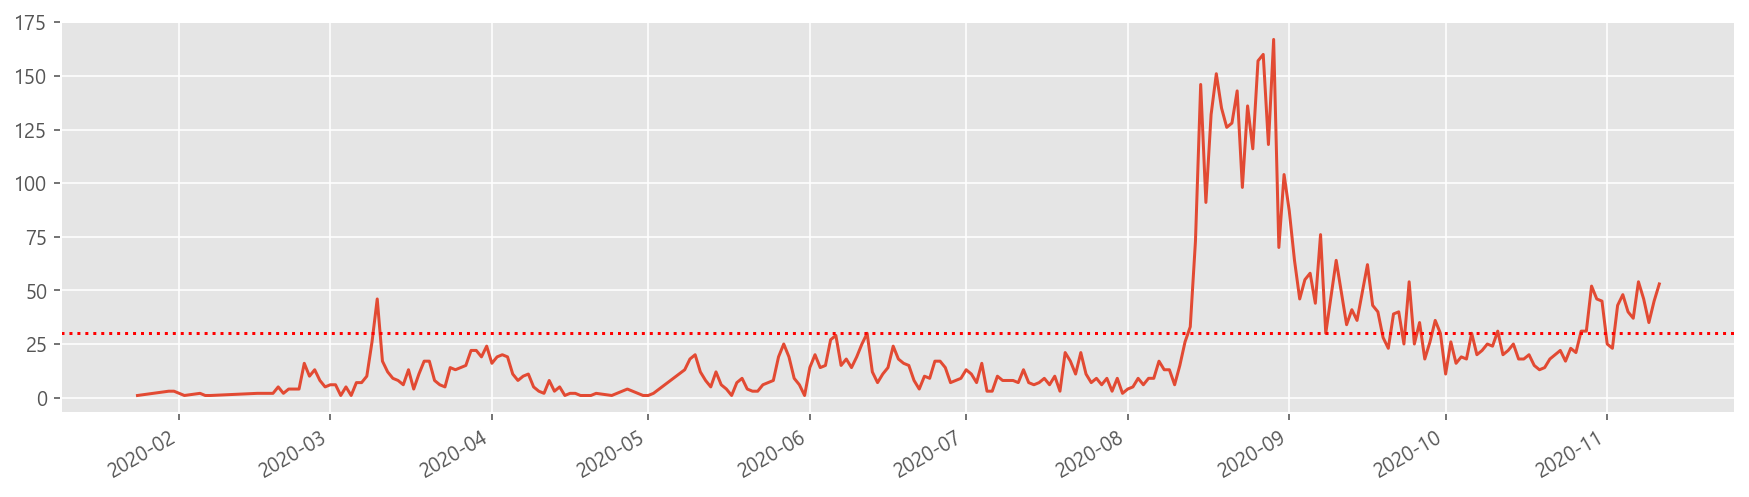

In [15]:
# 확진일자로 선그래프를 그립니다.

df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

### 선그래프에 값 표시하기

In [16]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[2]

3

In [17]:
# 확진자가 100명 이상 나온 날을 for문을 통해 찾아봅니다.
# 해당 일자가 day_count 에서의 인덱스 번호도 함께 구합니다.
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 100:
        print(i, case_count)

175 146
177 132
178 151
179 135
180 126
181 128
182 143
184 136
185 116
186 157
187 160
188 118
189 167
191 104


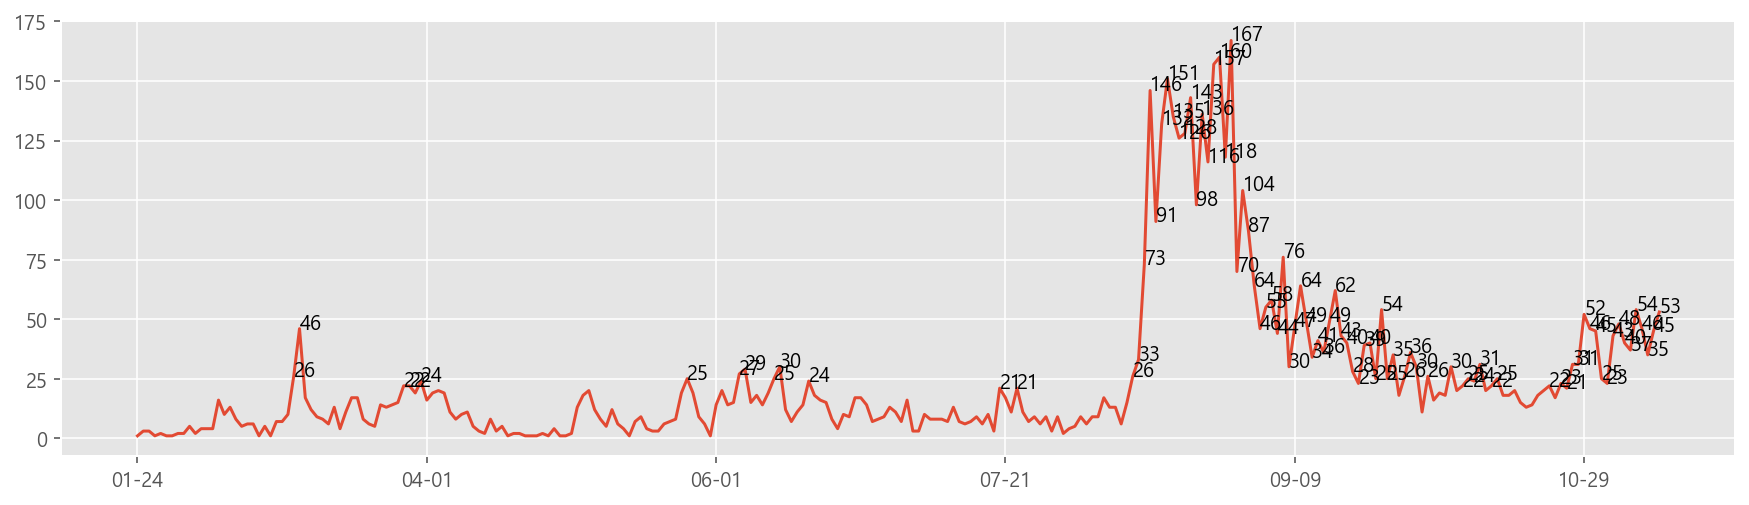

In [18]:
# 선 그래프를 그립니다.
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

### 확진자가 가장 많이 나온 날

In [19]:
# day_count 변수에 담긴값을 봅니다.
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
11-07    54
11-08    46
11-09    35
11-10    45
11-11    53
Name: 월일, Length: 264, dtype: int64

In [20]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.

day_count.describe()

count    264.000000
mean      24.640152
std       31.840788
min        1.000000
25%        7.000000
50%       14.000000
75%       26.000000
max      167.000000
Name: 월일, dtype: float64

In [21]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [22]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df["월일"] == "03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
6303,202,7567,3.10.,노원구,-,콜센터직원 접촉,퇴원,2020-03-10,3,11,03-10
6304,201,7711,3.10.,노원구,-,콜센터직원 접촉,퇴원,2020-03-10,3,11,03-10
6305,200,7555,3.10.,구로구,-,구로구 콜센터 관련,퇴원,2020-03-10,3,11,03-10
6306,199,7725,3.10.,양천구,-,구로구 콜센터 관련,퇴원,2020-03-10,3,11,03-10
6307,198,7539,3.10.,양천구,-,콜센터직원 접촉,퇴원,2020-03-10,3,11,03-10


### 막대그래프 그리기

<AxesSubplot:>

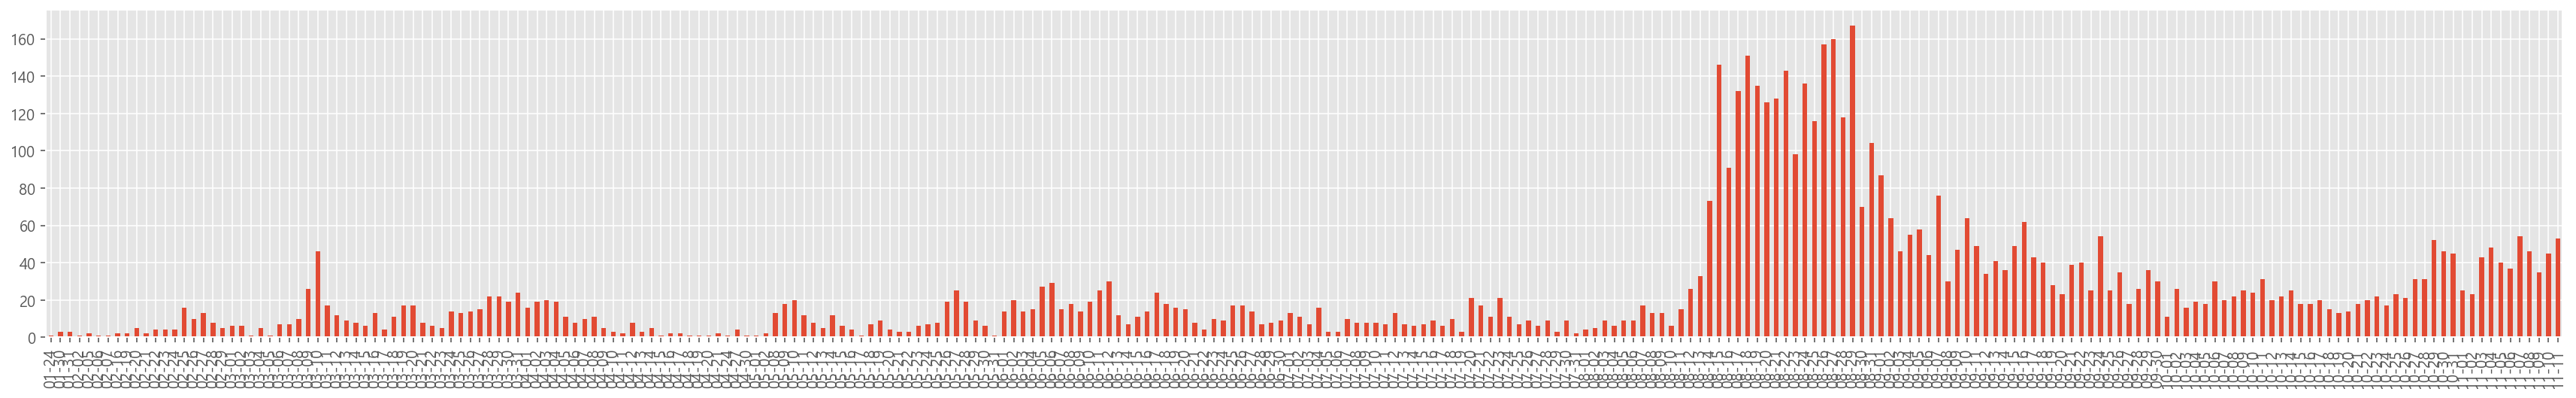

In [23]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize=(30, 4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

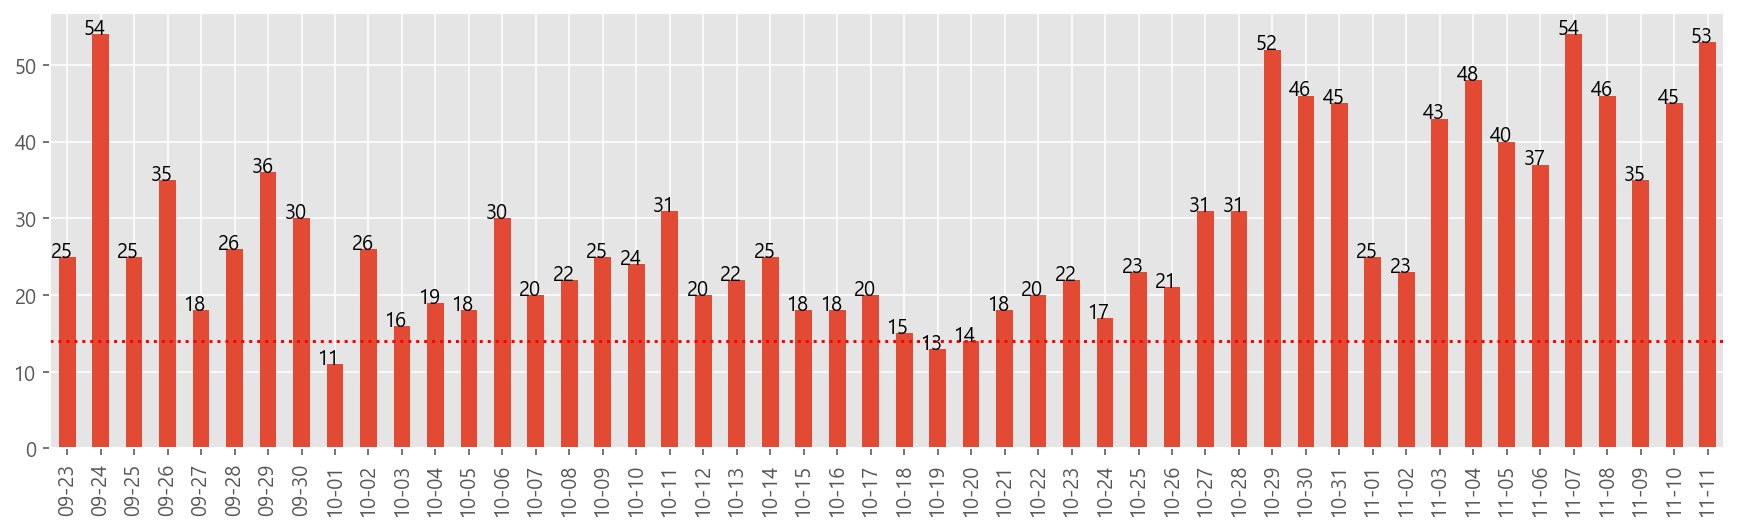

In [24]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), linestyle=":", color="red")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

### 월별 확진자 수 그리기

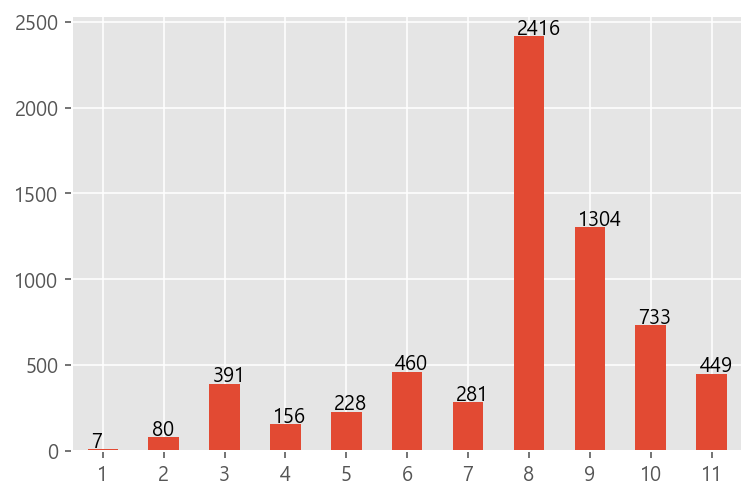

In [25]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

### 주단위 확진자수 그리기

<AxesSubplot:>

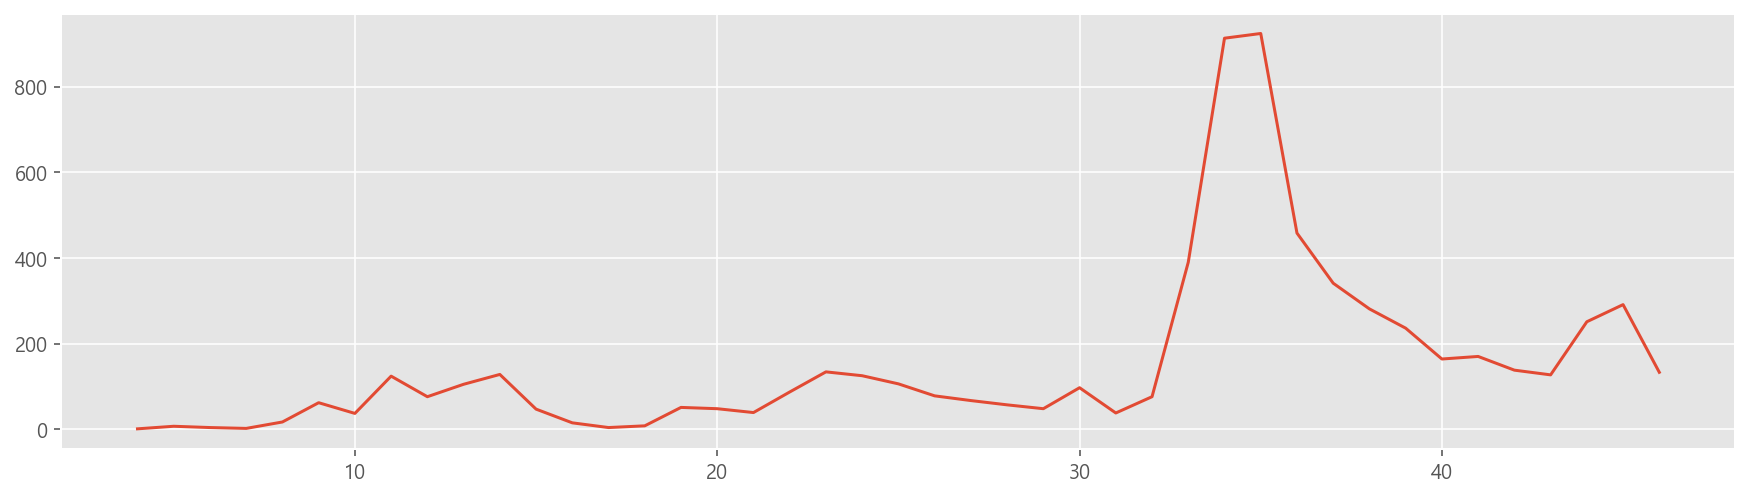

In [26]:
# 주별로 빈도수를 구합니다.

weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))

<AxesSubplot:>

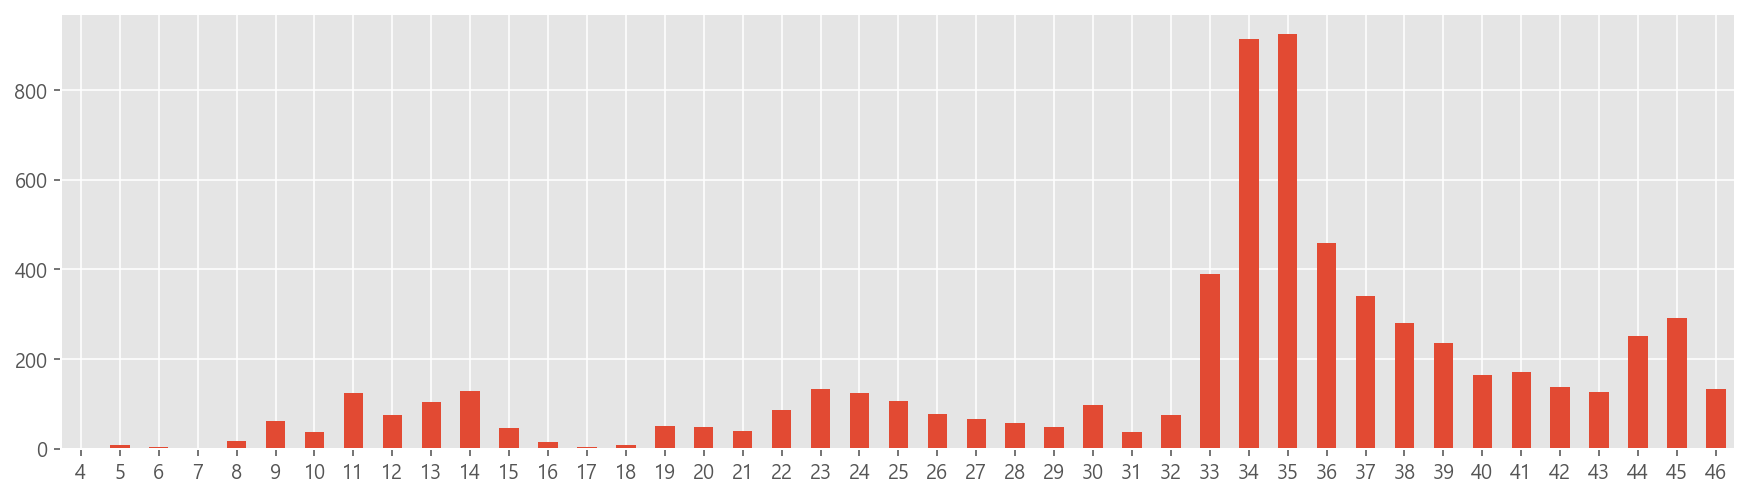

In [27]:
# 주단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(figsize=(15, 4), rot=0)

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [28]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1, 7]

In [29]:
last_day = df.iloc[0, 7]

In [30]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [31]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
df_days =  pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [32]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case.head()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
Name: 확진일자, dtype: int64

In [33]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [34]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기

df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [35]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
all_day = df_days.merge(df_daily_case, 
                        left_on="확진일자", 
                        right_on=df_daily_case.index, how="left")
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


## 누적 확진자 수 구하기

In [36]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.

all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
288,2020-11-07,54.0,6326.0
289,2020-11-08,46.0,6372.0
290,2020-11-09,35.0,6407.0
291,2020-11-10,45.0,6452.0


In [37]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [38]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day[["일자", "확진수", "누적확진"]]
cum_day = cum_day.set_index("일자")
cum_day.head()

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0


### 데이터프레임으로 그리기

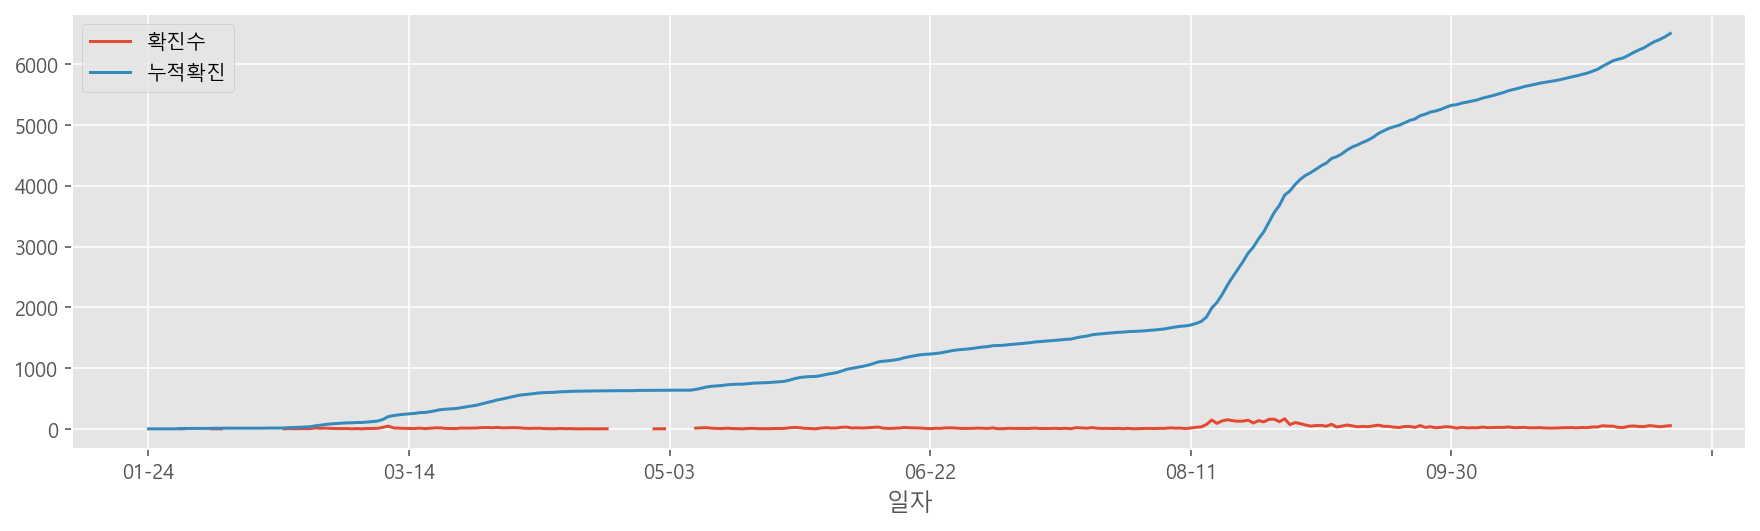

In [39]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.

g = cum_day.plot(figsize=(15, 4))


### 시리즈로 그리기

<AxesSubplot:xlabel='일자'>

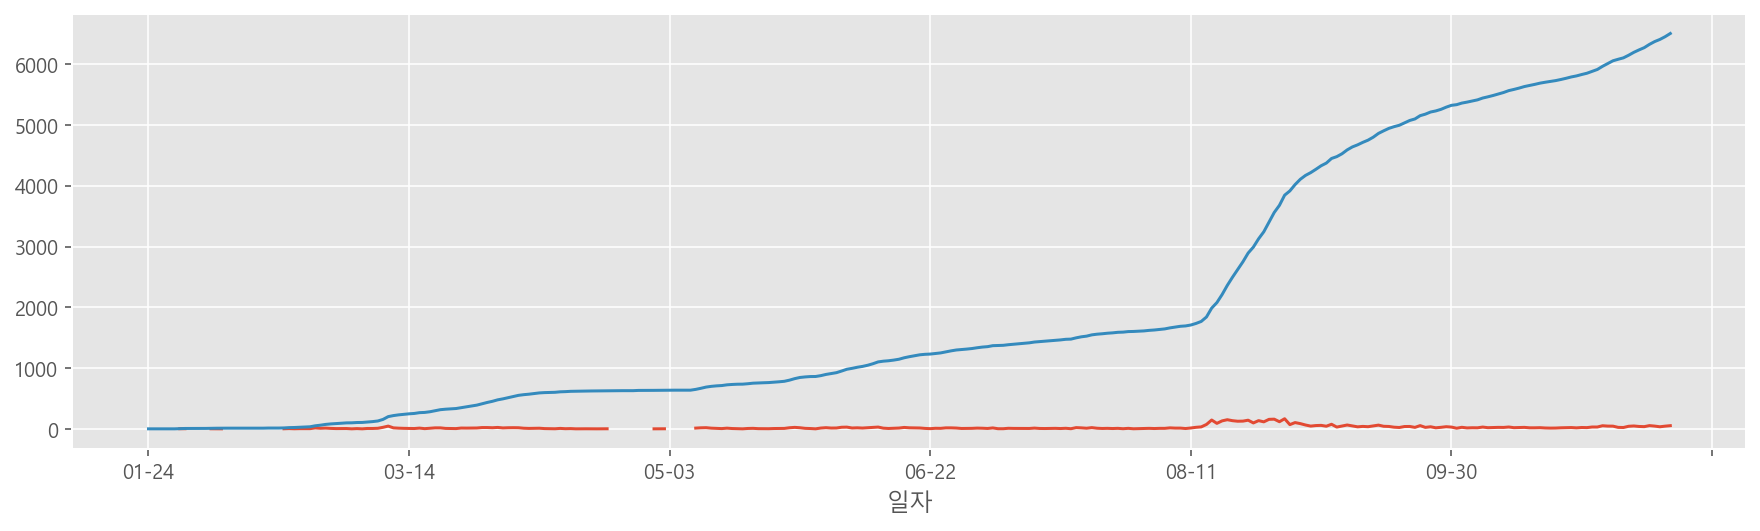

In [40]:
# 시리즈로 2개의 그래프 그리기

cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15, 4))

### 확진수만 따로 그리기

<AxesSubplot:xlabel='일자'>

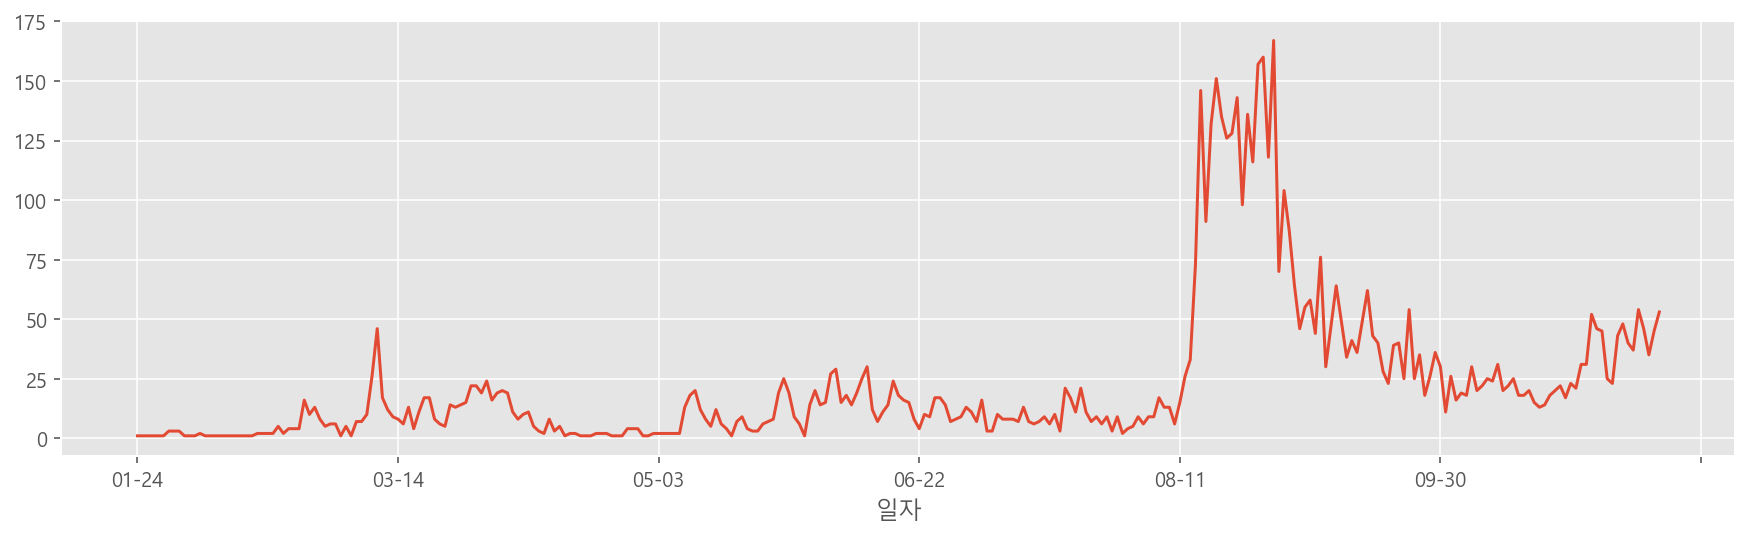

In [41]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
cum_day["확진수"].fillna(method="ffill").plot(figsize=(15, 4))

### 누적확진만 따로 그리기

<AxesSubplot:xlabel='일자'>

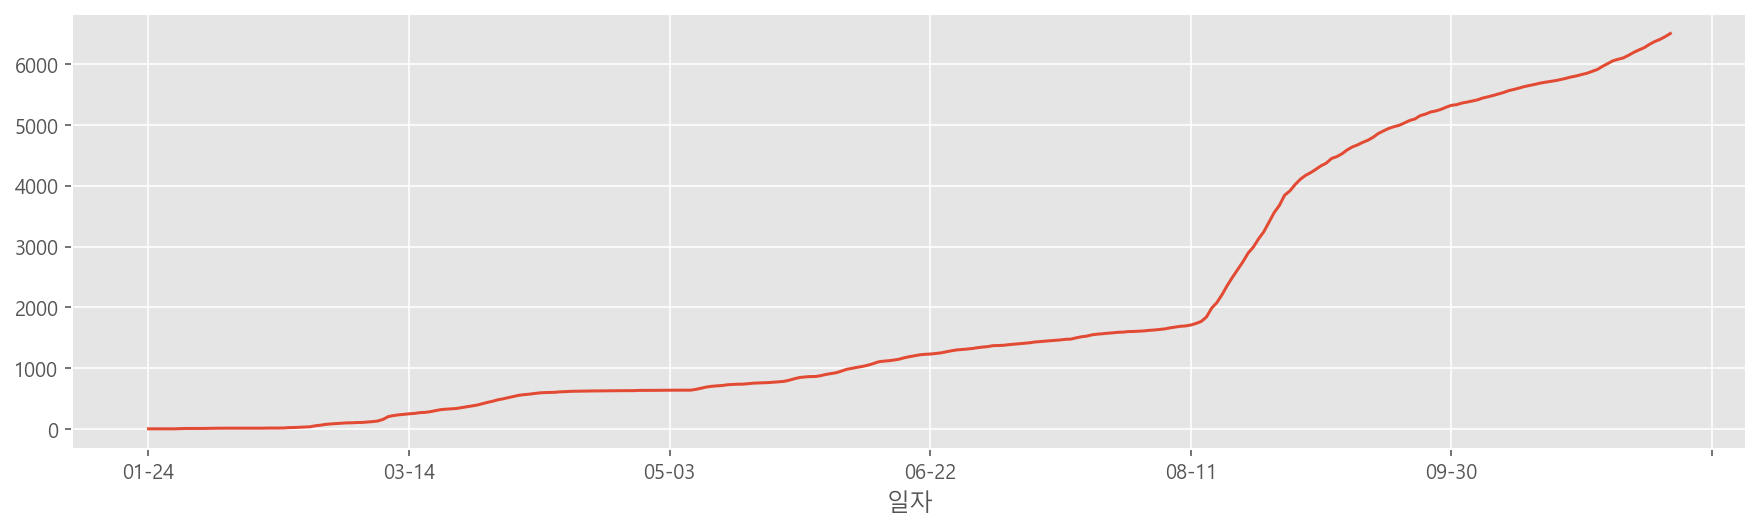

In [42]:
# 누적확진만 따로 그립니다.

cum_day["누적확진"].plot(figsize=(15, 4))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

<AxesSubplot:xlabel='일자'>

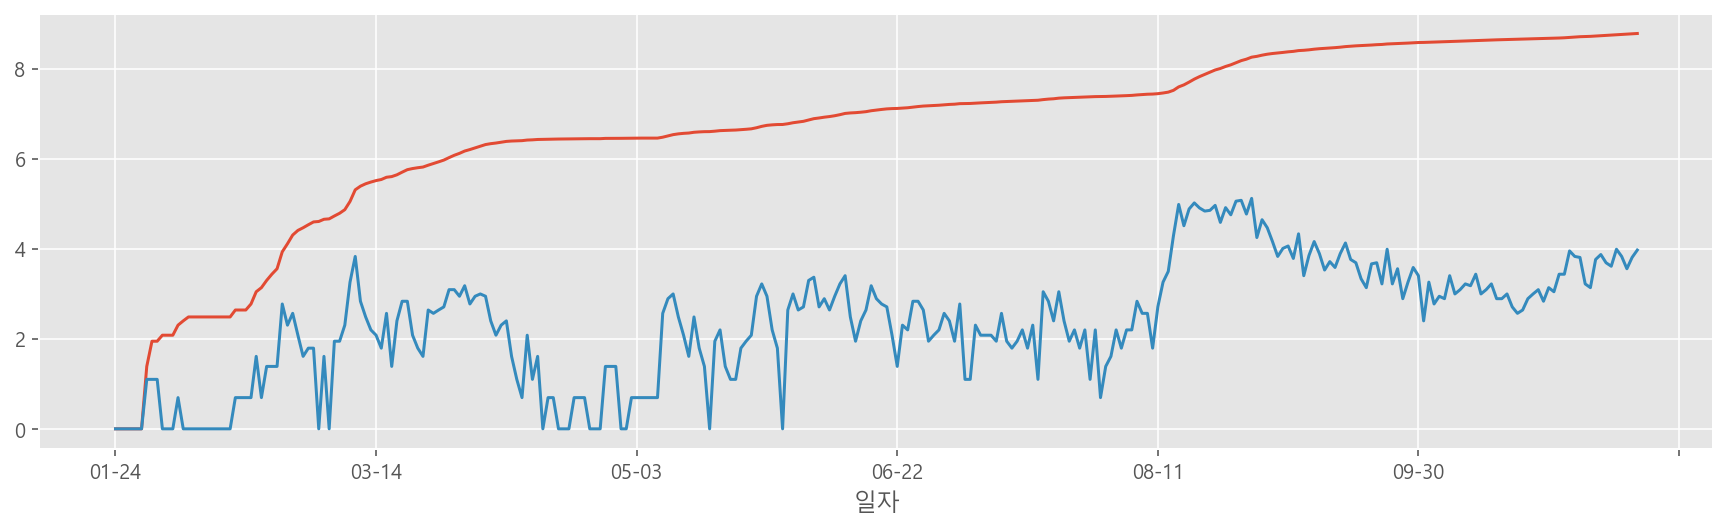

In [43]:
np.log(cum_day["누적확진"]).fillna(method="ffill").plot(figsize=(15, 4))
np.log(cum_day["확진수"]).fillna(method="ffill").plot()

## 확진월과 요일 구하기

In [44]:
# cum_day
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


### 요일별 확진 수 

In [45]:
# 월별, 요일별 확진수를 groupby로 구하기

all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [46]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [47]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.

all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [48]:
# style.background_gradient 로 색상을 표현합니다.

all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


## 거주지별 확진자

In [49]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.

gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    489
송파구    448
강남구    383
타시도    380
성북구    367
Name: 거주지, dtype: int64

<AxesSubplot:>

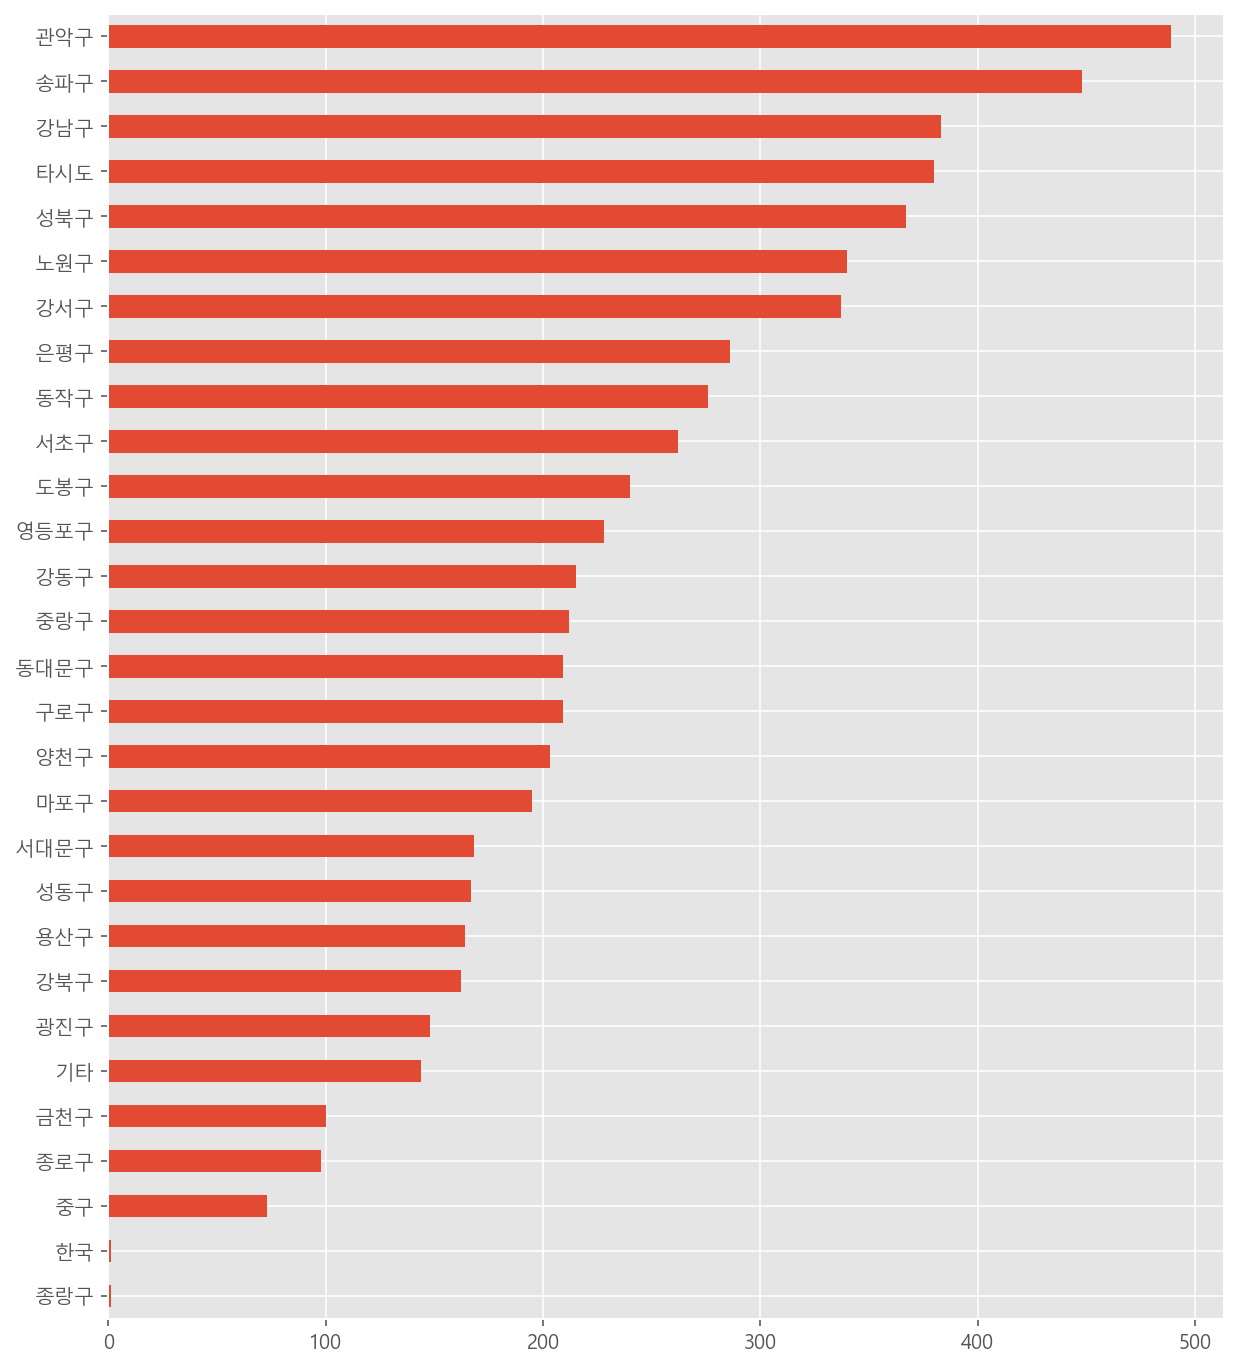

In [50]:
# 구별 확진자의 수를 시각화 합니다.

gu_count.sort_values().plot.barh(figsize=(10, 12))

In [51]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.

gu = gu_count[:25].index
gu

Index(['관악구', '송파구', '강남구', '타시도', '성북구', '노원구', '강서구', '은평구', '동작구', '서초구',
       '도봉구', '영등포구', '강동구', '중랑구', '동대문구', '구로구', '양천구', '마포구', '서대문구', '성동구',
       '용산구', '강북구', '광진구', '기타', '금천구'],
      dtype='object')

In [52]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

set(gu_count.index) - set(gu)

{'종랑구', '종로구', '중구', '한국'}

In [53]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ["구", "확진수"]
df_gu.head()

,구,확진수
0,관악구,489
1,송파구,448
2,강남구,383
3,타시도,380
4,성북구,367


In [54]:
# df_gu[~df_gu["구"].isin(gu)]

In [55]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
df.loc[df["거주지"].isin(gu), "지역"] = df["거주지"]
# df.loc[~df["거주지"].isin(gu)]
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
df["지역"] = df["지역"].fillna("타지역")
df["지역"].unique()

array(['타지역', '용산구', '타시도', '강동구', '송파구', '도봉구', '성북구', '서초구', '강북구',
       '동대문구', '서대문구', '성동구', '관악구', '영등포구', '노원구', '강남구', '금천구', '마포구',
       '강서구', '기타', '중랑구', '광진구', '은평구', '양천구', '동작구', '구로구'],
      dtype=object)

In [56]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"].map(lambda x : x if x in gu else "타지역")
df[["거주지", "지역"]].head()

,거주지,지역
0,중구,타지역
1,중구,타지역
2,용산구,용산구
3,타시도,타시도
4,강동구,강동구


In [57]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
gu_etc_count = df["지역"].value_counts()
gu_etc_count

관악구     489
송파구     448
강남구     383
타시도     380
성북구     367
노원구     340
강서구     337
은평구     286
동작구     276
서초구     262
도봉구     240
영등포구    228
강동구     215
중랑구     212
구로구     209
동대문구    209
양천구     203
마포구     195
타지역     173
서대문구    168
성동구     167
용산구     164
강북구     162
광진구     148
기타      144
금천구     100
Name: 지역, dtype: int64

<AxesSubplot:>

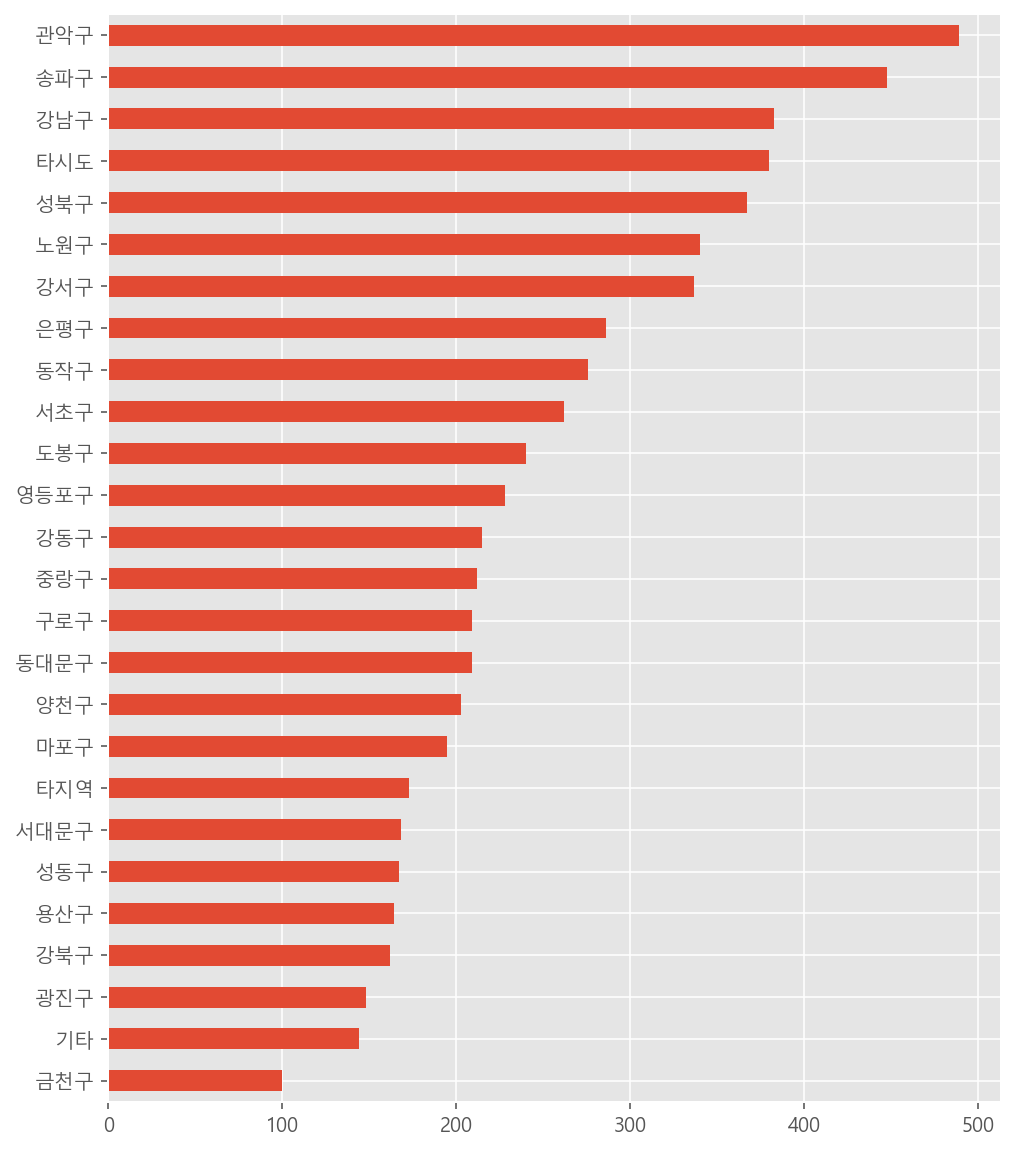

In [58]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.
gu_etc_count.sort_values().plot.barh(figsize=(8, 10))

## 접촉력

In [59]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

기타 확진자 접촉        931
성북구 사랑제일교회 관련    641
확인 중             586
감염경로 조사중         479
해외 접촉 추정         404
타시도 확진자 접촉       274
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
도봉구 다나병원          68
해외 유입             64
구로구 콜센터 관련        60
강남구 헬스장 관련        50
노원구 빛가온교회 관련      46
강남구 럭키사우나 관련      45
성북구 체대입시 관련       43
요양시설 관련           43
양천구 운동시설 관련       43
확인중               42
용인시 우리제일교회 관련     41
Name: 접촉력, dtype: int64

In [60]:
# 접촉력의 unique 값만 구합니다.

df["접촉력"].unique()

array(['성동구 금호노인요양원 관련', '감염경로 조사중', '용산구 국군복지단', '송파구 잠언의료기[강남구CJ텔레닉스]',
       '강서구 보험회사 관련', '송파구 시장 관련', '기타 확진자 접촉', '강남구 헬스장 관련',
       '영등포구 증권회사 관련', '동작구 모조카페', '동대문구 에이스희망케어센터 관련', '강남구 역삼역 관련',
       '타시도 확진자 접촉', '해외 유입', '강남구 럭키사우나 관련', '기타 확진자 접촉[강남구제약회사관련]',
       '생일파티모임관련', '영등포구 가족관련[송파구소재건설현장)', '관악구 삼모스포렉스Ⅱ', '용인시 동문골프 모임',
       '용산구 소재 의류업체', '서초구 빌딩 관련', '강서구 가족 관련', '서울음악 교습 관련', '강서구 직장 관련',
       '송파구 잠언의료기(CJ텔레닉스)', '종로구 녹음실 관련', '송파구 소재 교회관련', '동대문구 한국산업인력공단',
       '송파구 소재 병원관련', '언론인 관련', '제주도 지인모임', '구로구 가족관련',
       '구로구 가족관련[부천무용학원관련]', '영등포구 가족 관련(송파구소재 건설현장]', '기타확진자 접촉',
       '은평구 방문교사 관련', '기타 확진자 접촉[경기도SRC재활병원]', '강남서초 지인모임', '도봉구 가족 관련',
       '수도권 지인모임 Ⅱ', '중구 소재 콜센터', '수도권 지인모임 관련Ⅱ', '영등포구 가족관련',
       '서대문구 소재 장례식장', '부천무용학원관련[구로구 가족관련]', '강남구 CJ텔레닉스[잠언의료기]',
       '수도권 지인모임관련', '도봉구 예마루데이케어센터', '도봉구 다나병원', '강남구 CJ텔레닉스',
       '송파구 잠언의료기', '강남구 CJ텔레닉스 관련', '강동구 행복데이케어센터', '중랑구 이마트 상봉점',
       '해외 접촉 추정', '영등포구 방문판매업체 관련', '강남구 해냄세

In [61]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [62]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [63]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

<AxesSubplot:>

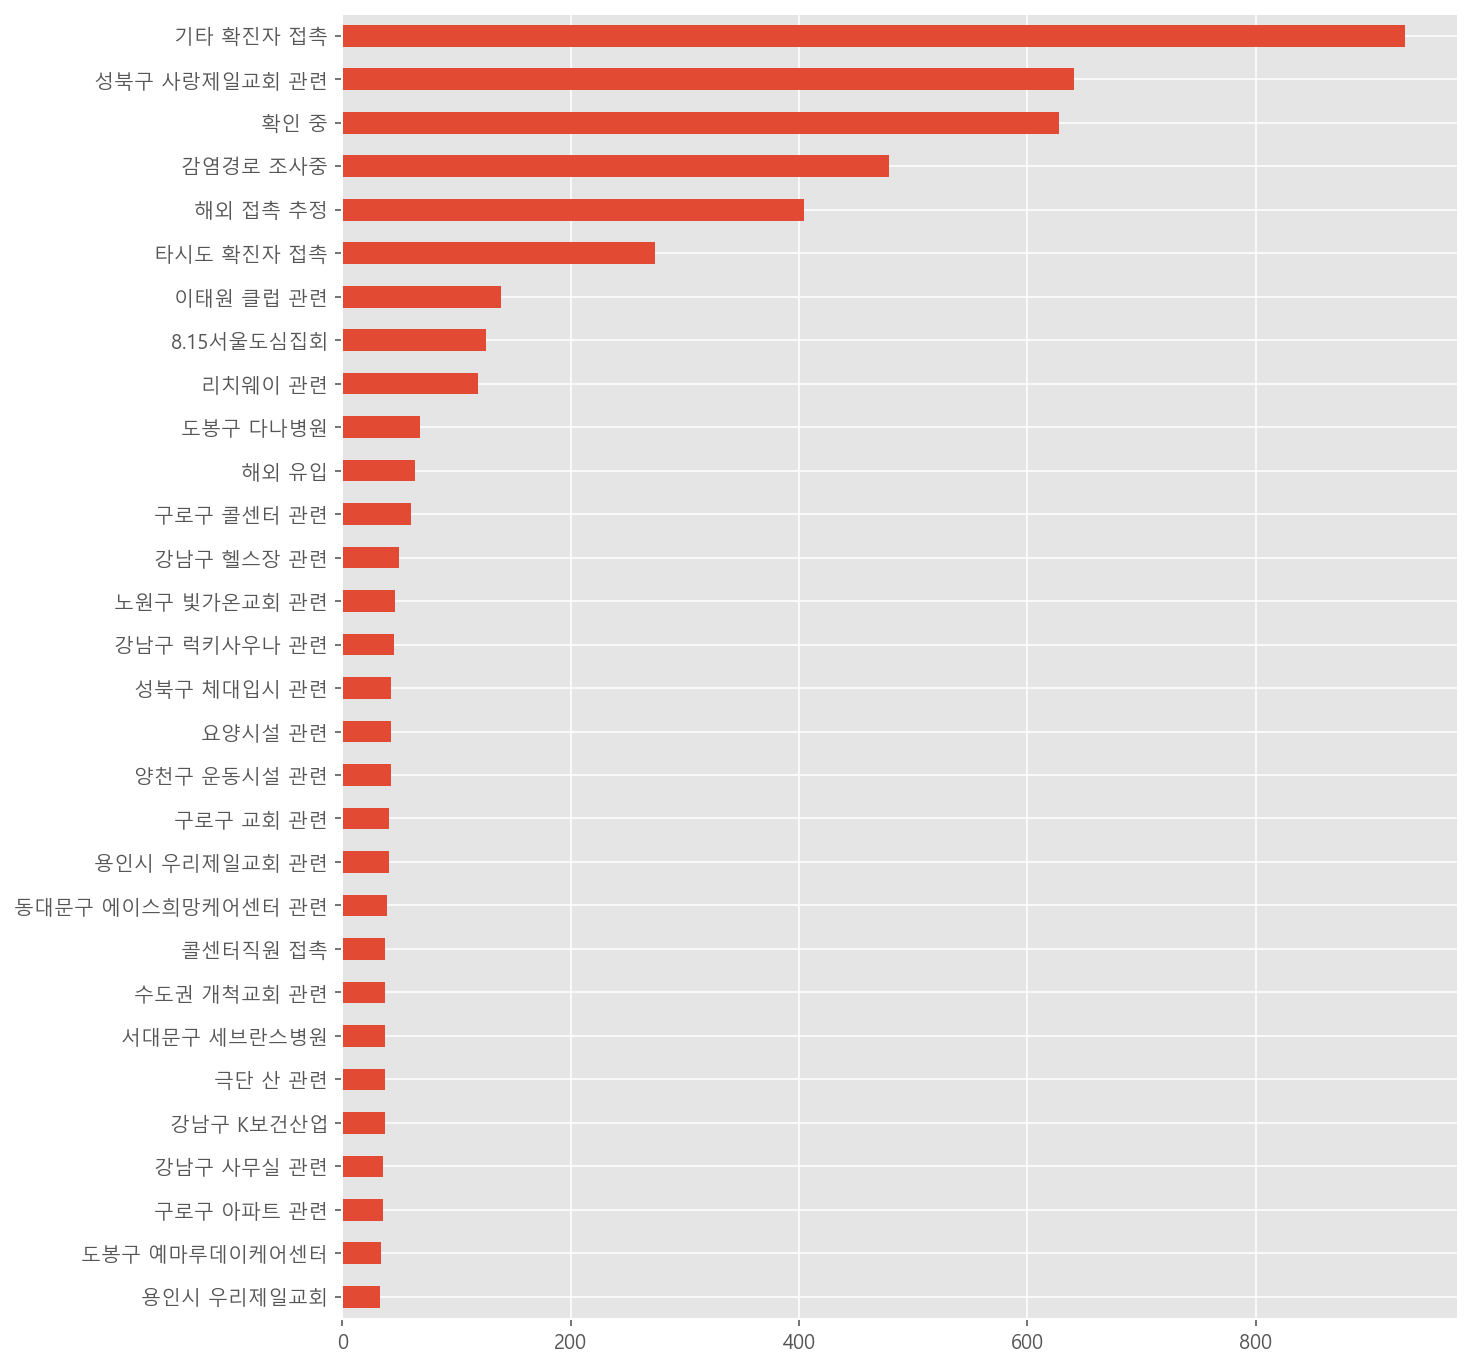

In [64]:
# 접촉력 빈도수를 시각화 합니다.

contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10, 12))

In [65]:
# 상위 15개만 구합니다.
top_contact = contact_count_top.tail(15)
top_contact

강남구 럭키사우나 관련      45
노원구 빛가온교회 관련      46
강남구 헬스장 관련        50
구로구 콜센터 관련        60
해외 유입             64
도봉구 다나병원          68
리치웨이 관련          119
8.15서울도심집회       126
이태원 클럽 관련        139
타시도 확진자 접촉       274
해외 접촉 추정         404
감염경로 조사중         479
확인 중             628
성북구 사랑제일교회 관련    641
기타 확진자 접촉        931
Name: 접촉력, dtype: int64

In [66]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.

top_contact.index

Index(['강남구 럭키사우나 관련', '노원구 빛가온교회 관련', '강남구 헬스장 관련', '구로구 콜센터 관련', '해외 유입',
       '도봉구 다나병원', '리치웨이 관련', '8.15서울도심집회', '이태원 클럽 관련', '타시도 확진자 접촉',
       '해외 접촉 추정', '감염경로 조사중', '확인 중', '성북구 사랑제일교회 관련', '기타 확진자 접촉'],
      dtype='object')

In [67]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
2,6503,27936,11.11.,용산구,-,감염경로 조사중,NaN,2020-11-11,11,46,11-11,용산구
8,6497,27917,11.11.,송파구,-,감염경로 조사중,NaN,2020-11-11,11,46,11-11,송파구
18,6487,27890,11.11.,강북구,-,기타 확진자 접촉,NaN,2020-11-11,11,46,11-11,강북구
19,6486,27881,11.11.,동대문구,-,강남구 헬스장 관련,NaN,2020-11-11,11,46,11-11,동대문구
20,6485,27898,11.11.,송파구,-,기타 확진자 접촉,NaN,2020-11-11,11,46,11-11,송파구


In [68]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

월,2,3,4,5,6,7,8,9,10,11
접촉력,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,113,13,0,0
감염경로 조사중,0,0,0,0,0,0,10,284,125,60
강남구 럭키사우나 관련,0,0,0,0,0,0,0,0,34,11
강남구 헬스장 관련,0,0,0,0,0,0,0,0,18,32
구로구 콜센터 관련,0,60,0,0,0,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,1,422,309,116,83
노원구 빛가온교회 관련,0,0,0,0,0,0,35,11,0,0
도봉구 다나병원,0,0,0,0,0,0,0,33,35,0
리치웨이 관련,0,0,0,0,119,0,0,0,0,0


### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

In [69]:
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
5525,980,11785,6.06.,관악구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,관악구
5540,965,11742,6.06.,영등포구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,영등포구
5549,956,11751,6.06.,용산구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,용산구
5556,949,11709,6.05.,송파구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,송파구
5571,934,11687,6.05.,성동구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,성동구
5629,876,11535,6.01.,강동구,-,이태원 클럽 관련,퇴원,2020-06-01,6,23,06-01,강동구


### 감염경로 불명

In [70]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

df_unknown = df[df["접촉력"] == "확인 중"]
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
2547,3958,20163,8.31.,양천구,-,확인 중,퇴원,2020-08-31,8,36,08-31,양천구
2548,3957,20141,8.31.,은평구,-,확인 중,퇴원,2020-08-31,8,36,08-31,은평구
2549,3956,20159,8.31.,용산구,-,확인 중,퇴원,2020-08-31,8,36,08-31,용산구
2553,3952,20130,8.31.,도봉구,-,확인 중,퇴원,2020-08-31,8,36,08-31,도봉구
2559,3946,20039,8.31.,타시도,-,확인 중,퇴원,2020-08-31,8,36,08-31,타시도


<AxesSubplot:xlabel='월,주'>

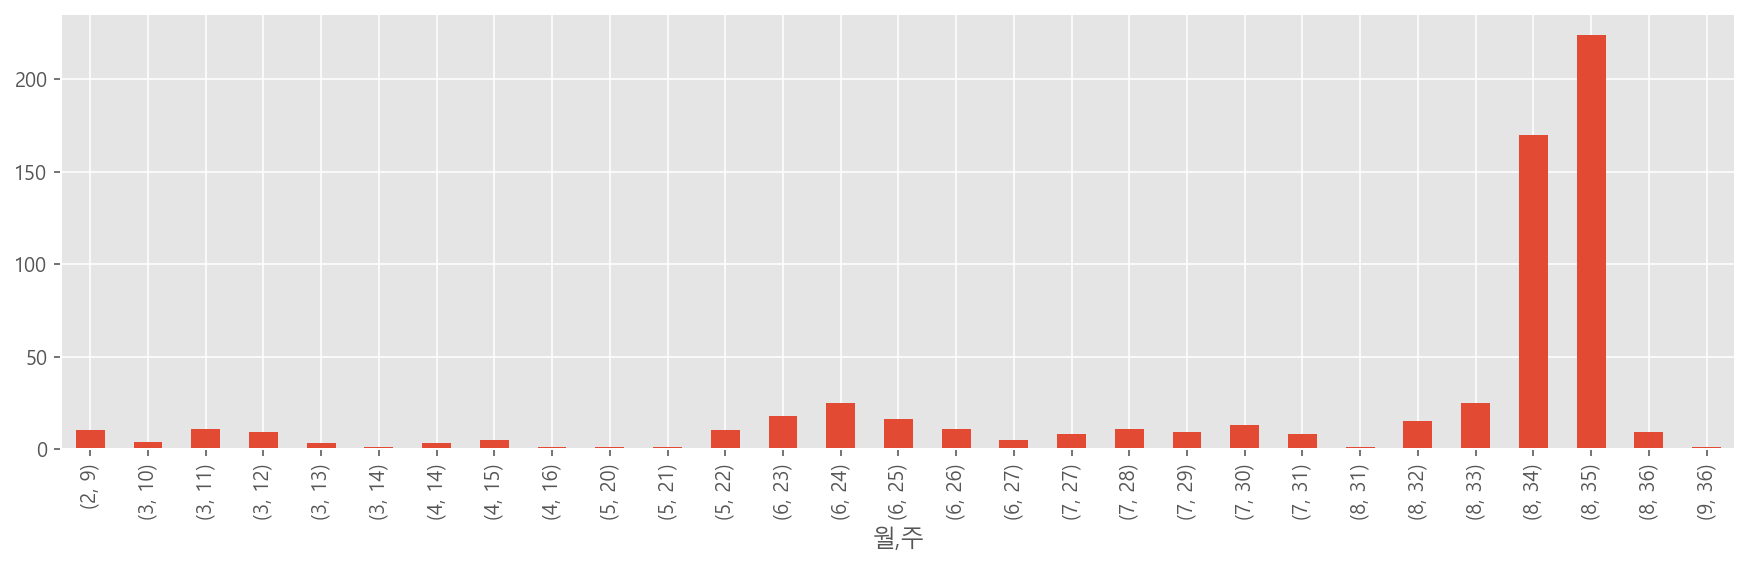

In [71]:
# 감염경로 불명이 어느정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15, 4))

In [72]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
35,924
34,913
36,458
33,390
37,341


In [73]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
35,224
34,170
24,25
33,25
23,18


In [74]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case.head()

,전체확진수,불명확진수
9,62,10
10,37,4
11,124,11
12,76,9
13,105,3


<AxesSubplot:>

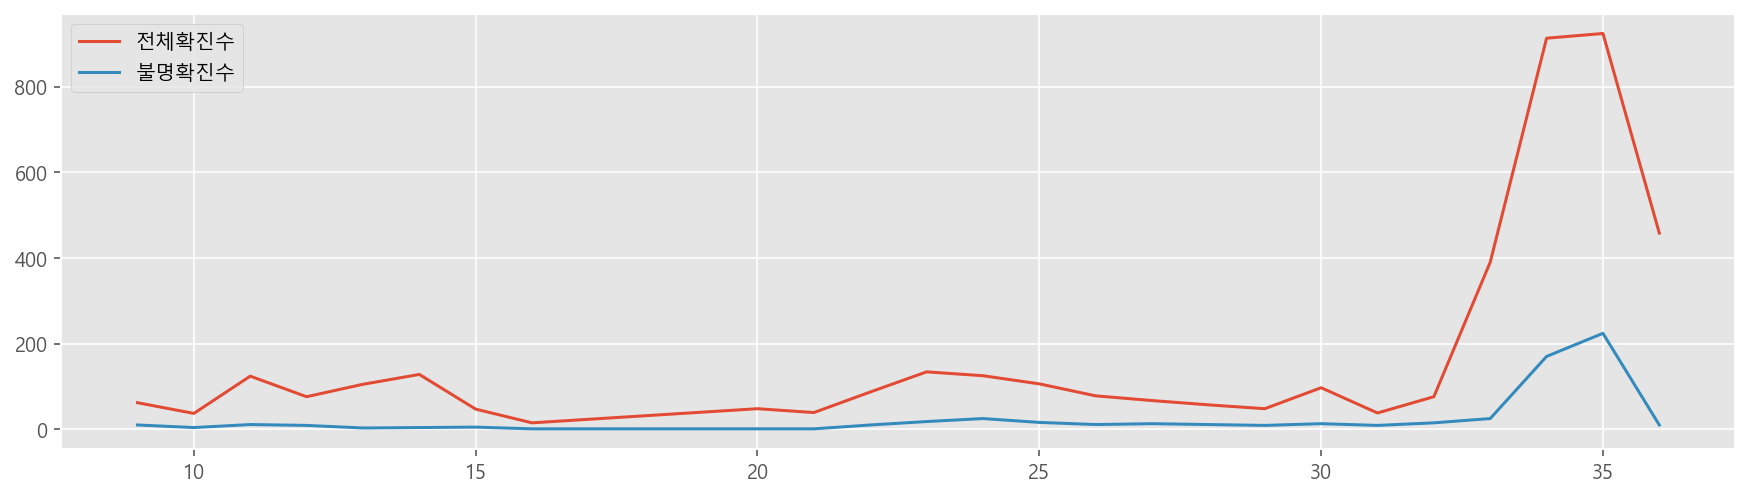

In [75]:
# 위에서 구한 결과를 시각화 합니다.

unknown_case.plot(figsize=(15, 4))

<AxesSubplot:>

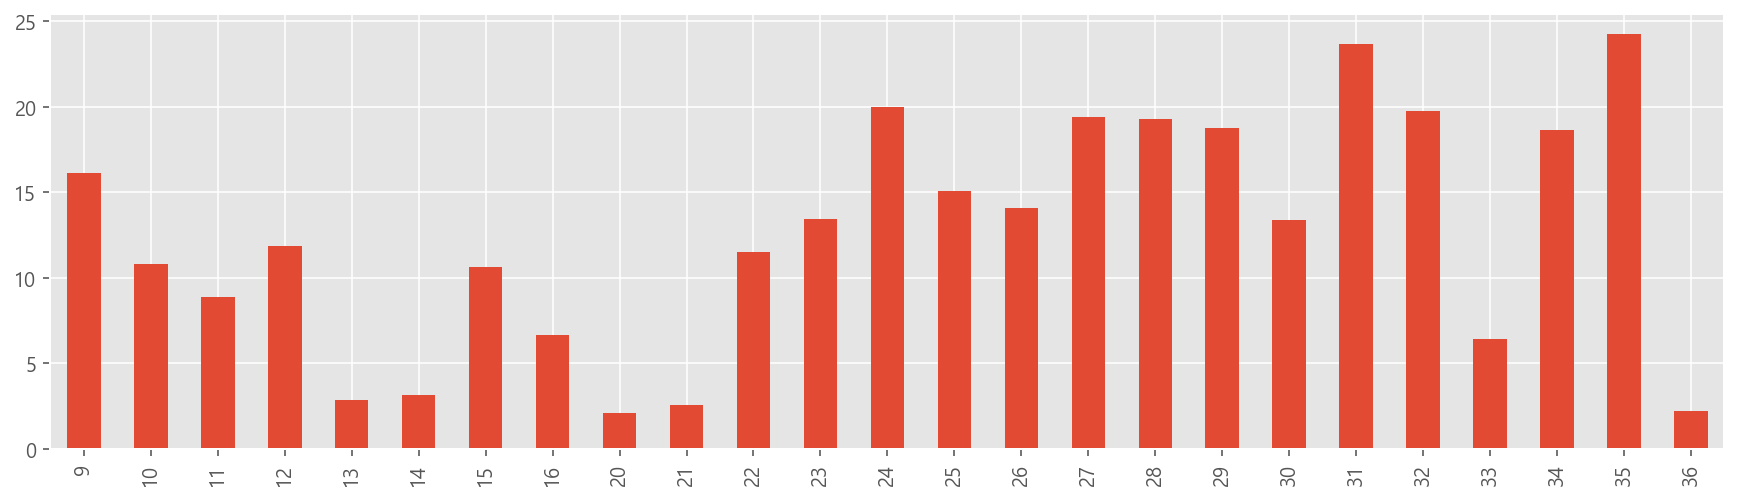

In [76]:
# 감염경로 "확인 중"의 주별 비율

unknown_case["확인중비율"] = (unknown_case["불명확진수"] / unknown_case["전체확진수"]) * 100
unknown_case["확인중비율"].plot.bar(figsize=(15, 4))

## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [77]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)


In [78]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(text):
    return re.sub("[^0-9]", "", text)

get_number("#7265 접촉(추정)")

'7265'

In [79]:
# 함수를 map을 통해 접촉번호를 구합니다.

df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,6286
1,815,126
2,9734,4
3,6,4
4,9,4


In [80]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact = contact.drop(0)
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,815,126
2,9734,4
3,6,4
4,9,4
5,14483,3
6,8271,3
7,780,3
8,8486,3
9,8791,3
10,9287,2


In [81]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

top_contact_no = df_contact["index"]

In [82]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.

df[df["접촉번호"].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
1545,4960,22951,9.19.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-19,9,38,09-19,송파구,9
1612,4893,22755,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
1613,4892,22756,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
1614,4891,22757,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
1831,4674,22192,9.13.,마포구,-,8.15서울도심집회,사망,2020-09-13,9,37,09-13,마포구,815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,33,797,2.24.,송파구,-,#780 접촉(추정),퇴원,2020-02-24,2,9,02-24,송파구,780
6488,17,83,2.20.,종로구,-,#6 접촉(추정),퇴원,2020-02-20,2,8,02-20,타지역,6
6495,10,21,2.5.,성북구,-,#6 접촉,퇴원,2020-02-05,2,6,02-05,성북구,6
6498,7,11,1.31.,종로구,-,#6 접촉,퇴원,2020-01-31,1,5,01-31,타지역,6


## 퇴원현황

In [83]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.

df["퇴원"] = df["퇴원현황"].str.contains("퇴원")
df["사망"] = df["퇴원현황"].str.contains("사망")

In [84]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수

df["퇴원"].value_counts()

True     5826
False      79
Name: 퇴원, dtype: int64

In [85]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.

df["퇴원"].value_counts(normalize=True)

True     0.986622
False    0.013378
Name: 퇴원, dtype: float64

In [86]:
# 사망여부에 따른 빈도수를 구합니다.

df["사망"].value_counts()

False    5826
True       79
Name: 사망, dtype: int64

In [87]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.
df["사망"].value_counts(normalize=True) * 100

False    98.662151
True      1.337849
Name: 사망, dtype: float64

* 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [88]:
# 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

df[df["퇴원"].isnull() & df["사망"].isnull()].tail(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망
2311,4194,20833,9.03.,은평구,-,성북구 사랑제일교회 관련,NaN,2020-09-03,9,36,09-03,은평구,,NaN,NaN
2343,4162,20724,9.02.,은평구,-,성북구 사랑제일교회 관련,NaN,2020-09-02,9,36,09-02,은평구,,NaN,NaN
2544,3961,18223,8.25.,타시도,-,동작구 진흥글로벌,NaN,2020-08-25,8,35,08-25,타시도,,NaN,NaN
2545,3960,18896,8.24.,타시도,-,동작구 진흥글로벌,NaN,2020-08-24,8,35,08-24,타시도,,NaN,NaN
2736,3769,19484,8.29.,타시도,-,동작구 진흥글로벌,NaN,2020-08-29,8,35,08-29,타시도,,NaN,NaN
2740,3765,19449,8.29.,타시도,-,확인 중,NaN,2020-08-29,8,35,08-29,타시도,,NaN,NaN
3086,3419,17843,8.27.,타시도,-,8.15서울도심집회,NaN,2020-08-27,8,35,08-27,타시도,815,NaN,NaN
3143,3362,18331,8.26.,타시도,-,확인 중,NaN,2020-08-26,8,35,08-26,타시도,,NaN,NaN
3914,2591,16415,8.20.,노원구,-,성북구 사랑제일교회 관련,NaN,2020-08-20,8,34,08-20,노원구,,NaN,NaN
4217,2288,15980,8.18.,동대문구,-,마포구 푸본생명콜센터,NaN,2020-08-18,8,34,08-18,동대문구,,NaN,NaN


## 여행력

In [89]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].nunique()

90

In [90]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df["해외"].describe()

count     497
unique     90
top        미국
freq      161
Name: 해외, dtype: object

In [91]:
df["해외"].value_counts().head(10)

미국        161
영국         50
필리핀        25
우즈베키스탄     15
프랑스        15
인도         14
스페인        12
이라크        10
카자흐스탄      10
일본         10
Name: 해외, dtype: int64

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [92]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(497, 16)

In [93]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea["해외"].unique()

array(['케냐', '수단', '루마니아', '미국', '헝가리', '폴란드', '프랑스', '러시아', '인도', '핀란드',
       '사우디아라비아', '가나', '튀니지', '이탈리아', '아랍에미리트', '우즈베키스탄', '독일', '네팔',
       '방글라데시', '에디오피아', '네덜란드', '키르기스스탄', '이란', '체코', '필리핀', '일본', '브라질',
       '요르단', '쿠웨이트', '인도네시아', '우간다', '몰타', '영국', '카타르', '우크라이나', '에콰도르',
       '키르기즈스탄', '파라과이', '멕시코, 미국', '카자흐스탄', '중국', '이집트', '21263', '터키',
       '베트남', '에티오피아', '스페인', '멕시코', '홍콩', '이라크', '모로코, 터키', '나이지리아',
       '미국, 멕시코', '페루', 'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '포르투칼',
       '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아',
       '프랑스, 독일', '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아', '영국, 프랑스',
       '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스', '이탈리아, 독일, 홍콩',
       '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'], dtype=object)

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [94]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,해외
97,6408,27739,11.10.,용산구,헝가리,해외 유입,NaN,2020-11-10,11,46,11-10,용산구,,NaN,NaN,헝가리
122,6383,27592,11.09.,기타,폴란드,해외 유입,NaN,2020-11-09,11,46,11-09,기타,,NaN,NaN,폴란드
129,6376,27593,11.09.,은평구,프랑스,해외 유입,NaN,2020-11-09,11,46,11-09,은평구,,NaN,NaN,프랑스
254,6251,27224,11.06.,성동구,프랑스,해외 유입,NaN,2020-11-06,11,45,11-06,성동구,,NaN,NaN,프랑스
319,6186,27012,11.04.,기타,이탈리아,해외 유입,NaN,2020-11-04,11,45,11-04,기타,,NaN,NaN,이탈리아


In [95]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [96]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea.loc[df_oversea["해외"].str.contains("키르기스스탄"), "해외"] = "키르기즈스탄"
df_oversea["해외"].value_counts()

미국           163
유럽           120
필리핀           27
남미            23
우즈베키스탄        15
인도            14
이라크           10
일본            10
카자흐스탄         10
러시아            9
중국             9
인도네시아          7
키르기즈스탄         7
UAE            6
사우디아라비아        6
태국             6
캐나다            5
방글라데시          5
파키스탄           4
네팔             4
베트남            3
이집트            2
쿠웨이트           2
팔라우            2
에콰도르           2
루마니아           2
우크라이나          2
케냐             2
말레이시아          1
포르투칼           1
호주, 인도네시아      1
수단             1
싱가포르           1
카타르            1
우간다            1
핀란드            1
몰타             1
튀니지            1
에디오피아          1
요르단            1
네덜란드           1
21263          1
홍콩             1
나이지리아          1
가나             1
파라과이           1
이란             1
에티오피아          1
Name: 해외, dtype: int64

In [97]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df_oversea["해외"].describe()

count     497
unique     48
top        미국
freq      163
Name: 해외, dtype: object

In [98]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

In [99]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외  
2020-01-24  중국        1
2020-01-30  중국        3
2020-02-02  중국        4
2020-02-05  싱가포르      1
2020-02-06  중국        5
                   ... 
2020-11-10  루마니아      2
            미국      163
            수단        1
            유럽      120
2020-11-11  케냐        2
Name: 연번, Length: 323, dtype: int64

In [100]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [101]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts()

<AxesSubplot:>

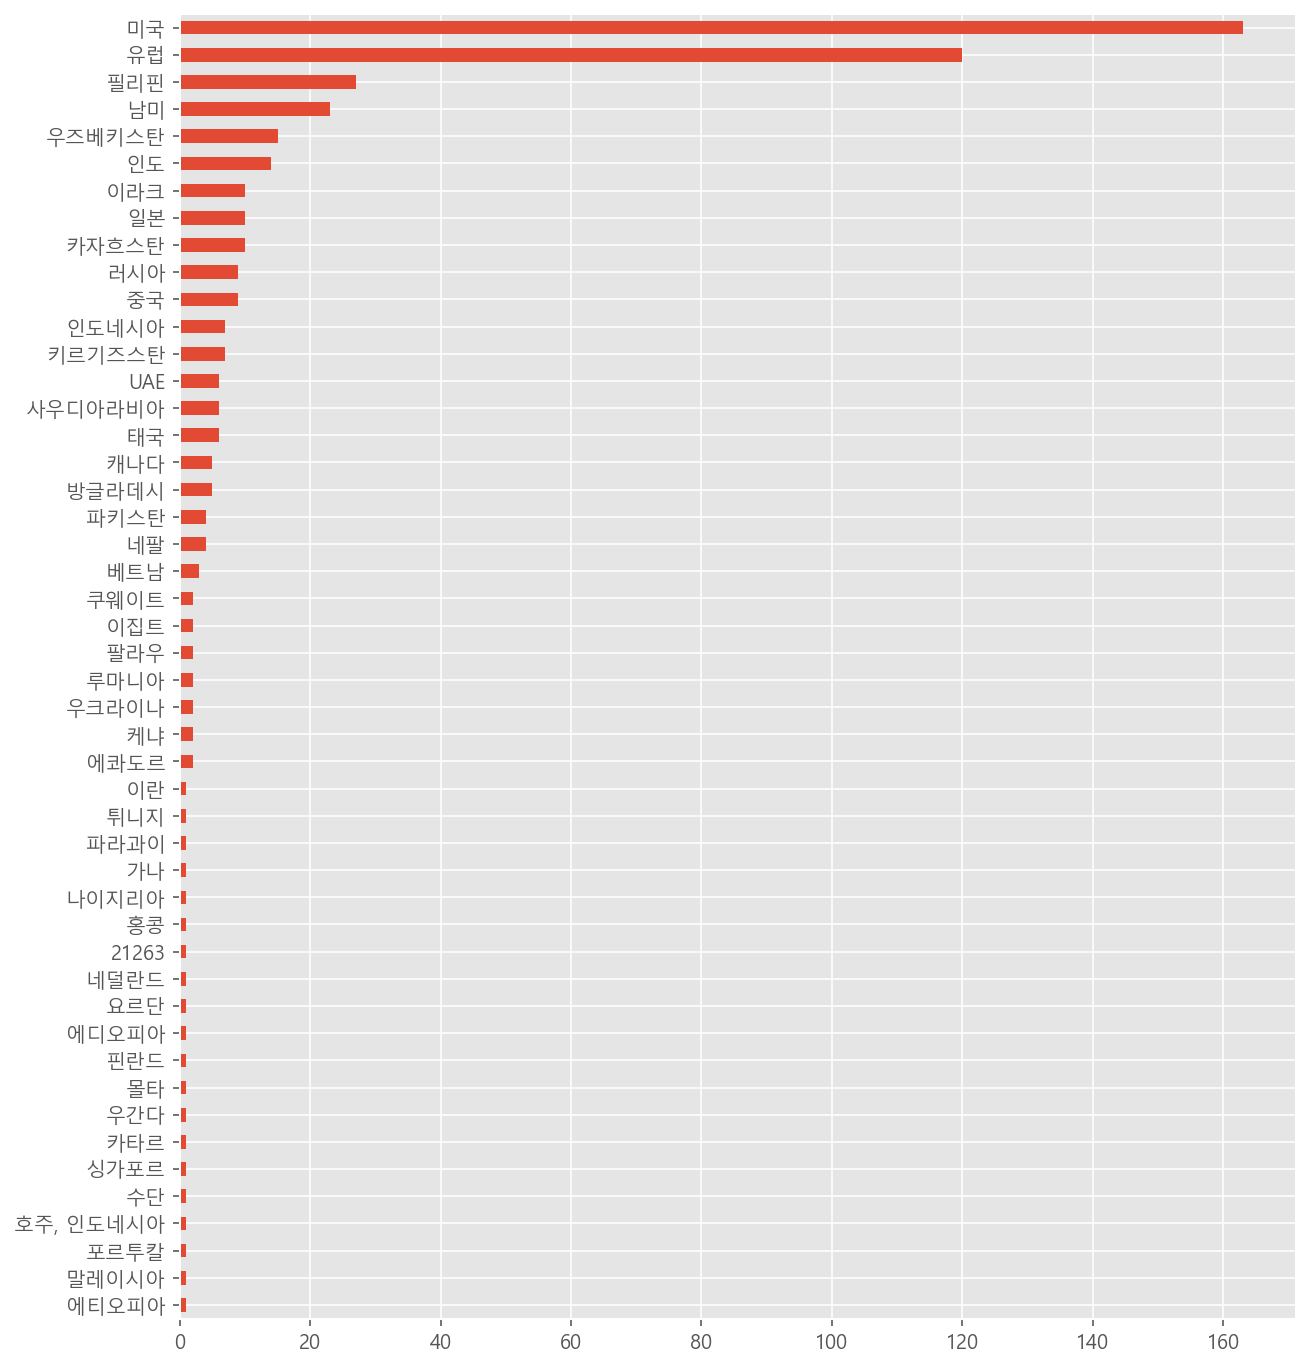

In [102]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize=(10, 12))

In [103]:
df_day_oversea = df_day_oversea.set_index("확진일자")

<AxesSubplot:xlabel='확진일자'>

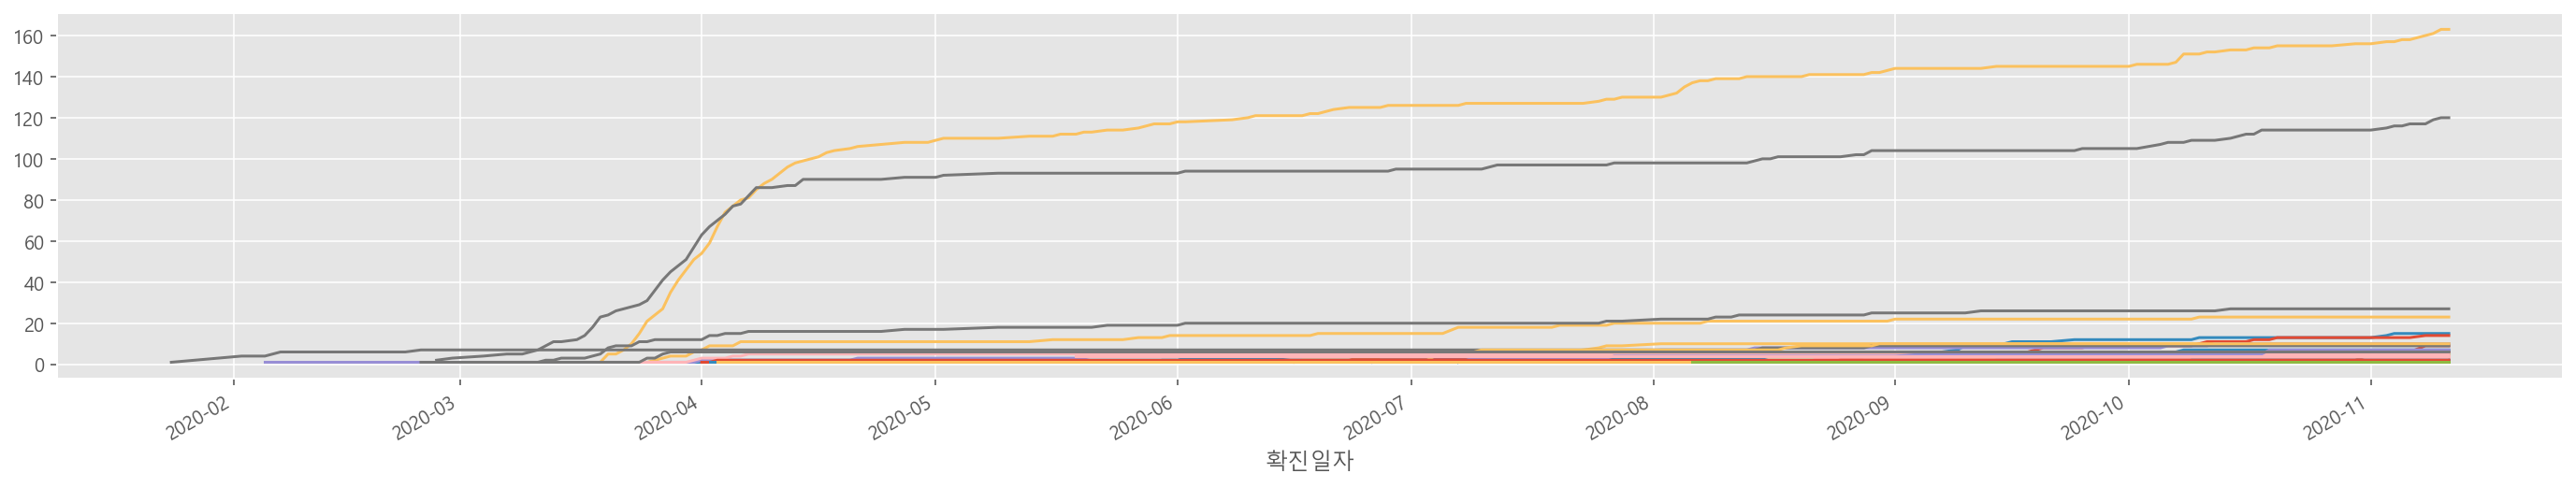

In [104]:
df_day_oversea.pivot(columns="해외").fillna(method="ffill").plot(figsize=(24, 4), legend=False)

<AxesSubplot:xlabel='확진일자'>

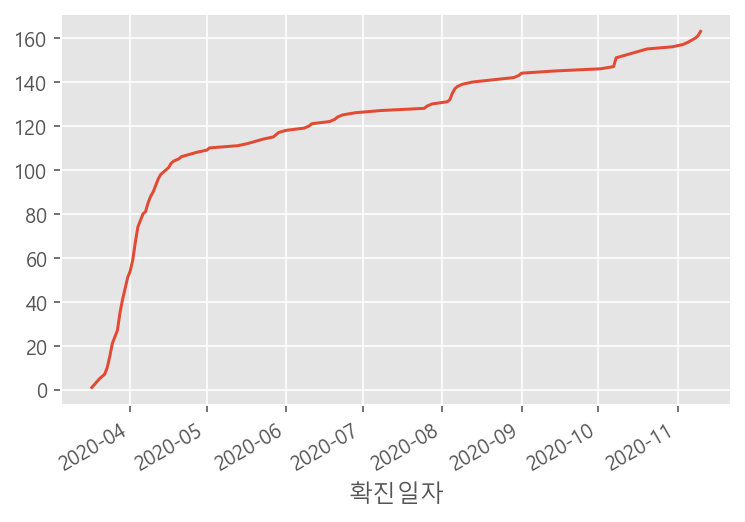

In [105]:
df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot()

In [106]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

강남구    50
기타     45
용산구    35
마포구    33
송파구    31
Name: 지역, dtype: int64

<AxesSubplot:>

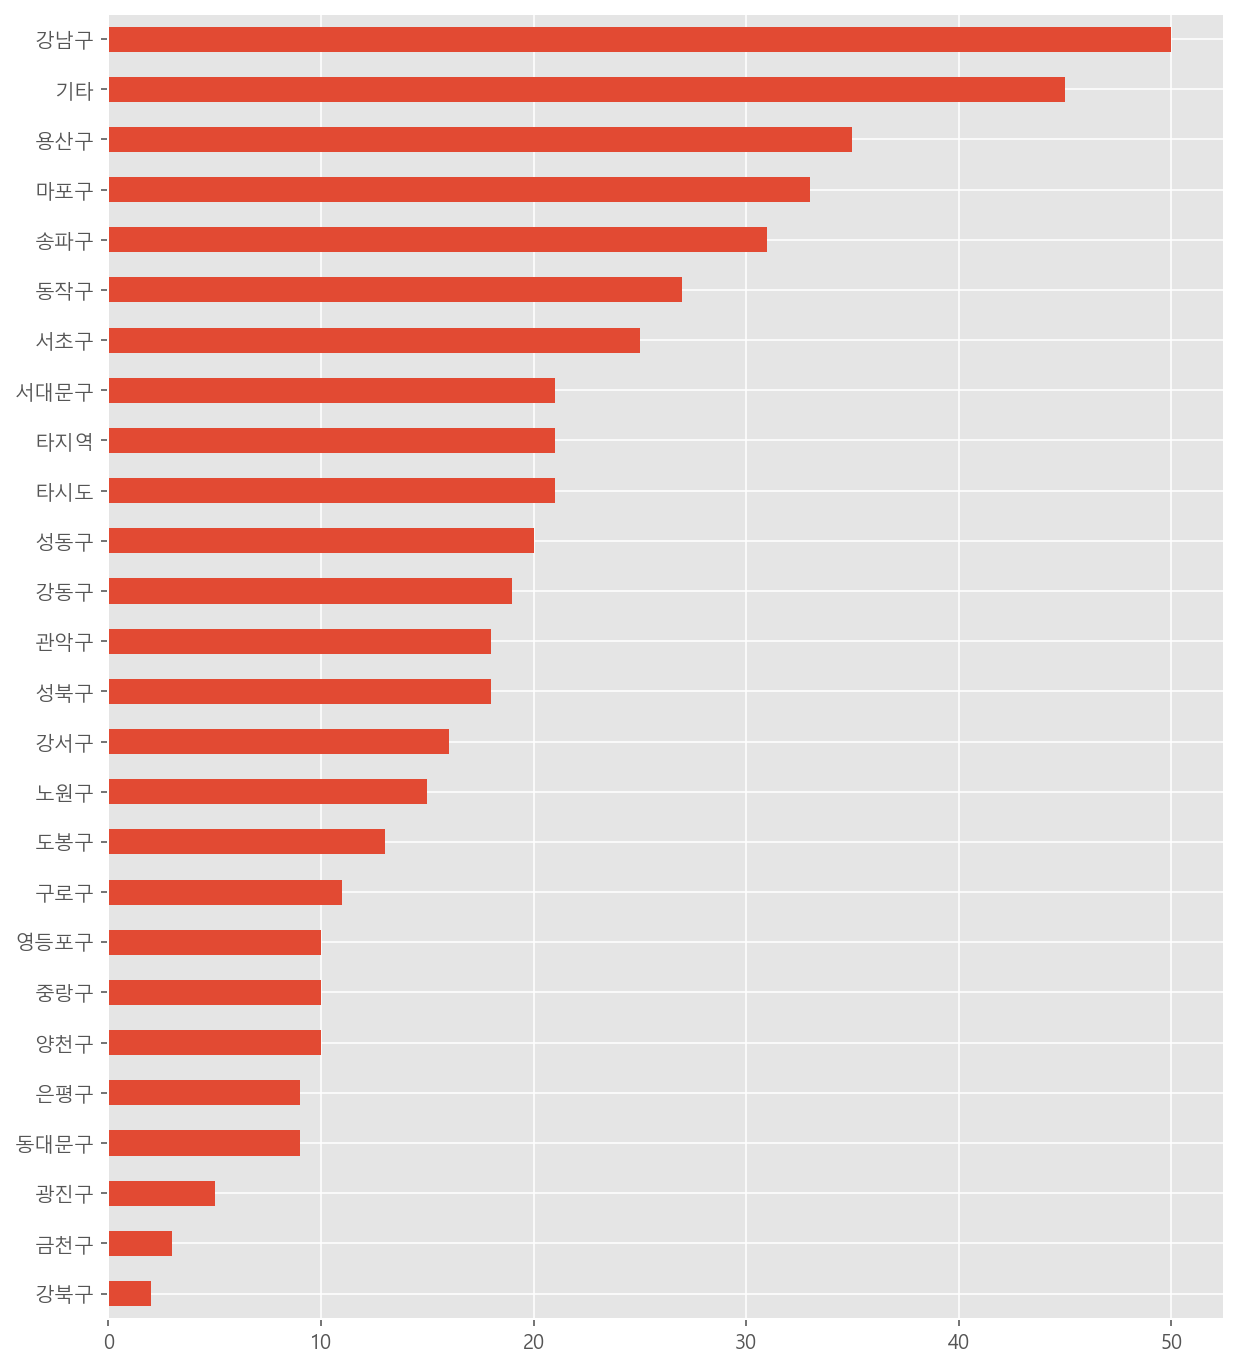

In [107]:
# "해외유입 구별 확진자" 시각화 하기

oversea_count_gu.sort_values().plot.barh(figsize=(10, 12))

### 전체확진수와 해외유입 확진수 비교

In [108]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()

In [109]:
# 데이터프레임으로 변환하고 컬럼명 변경하기

df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu

,전체확진수
관악구,489
송파구,448
강남구,383
타시도,380
성북구,367
노원구,340
강서구,337
은평구,286
동작구,276
서초구,262


In [110]:
# 해외유입확진수 구하기

df_oversea_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})

### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [111]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,489,18
송파구,448,31
강남구,383,50
타시도,380,21
성북구,367,18


<AxesSubplot:>

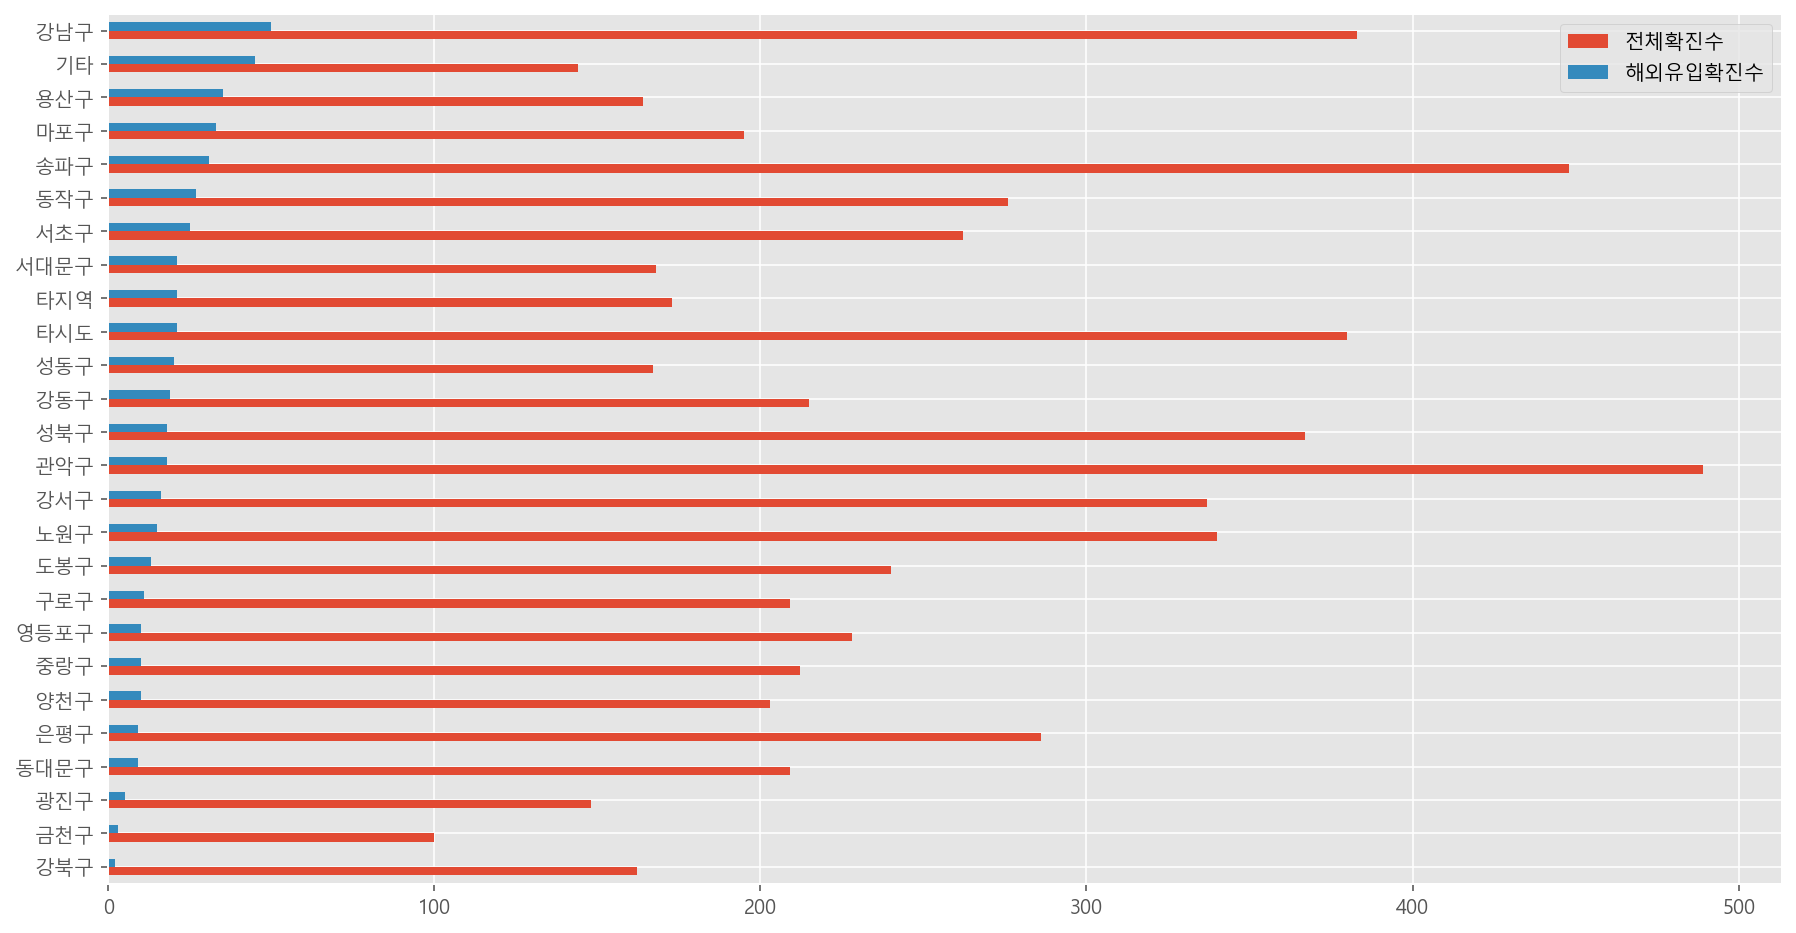

In [112]:
# 시각화 하기

df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(15, 8))

<AxesSubplot:>

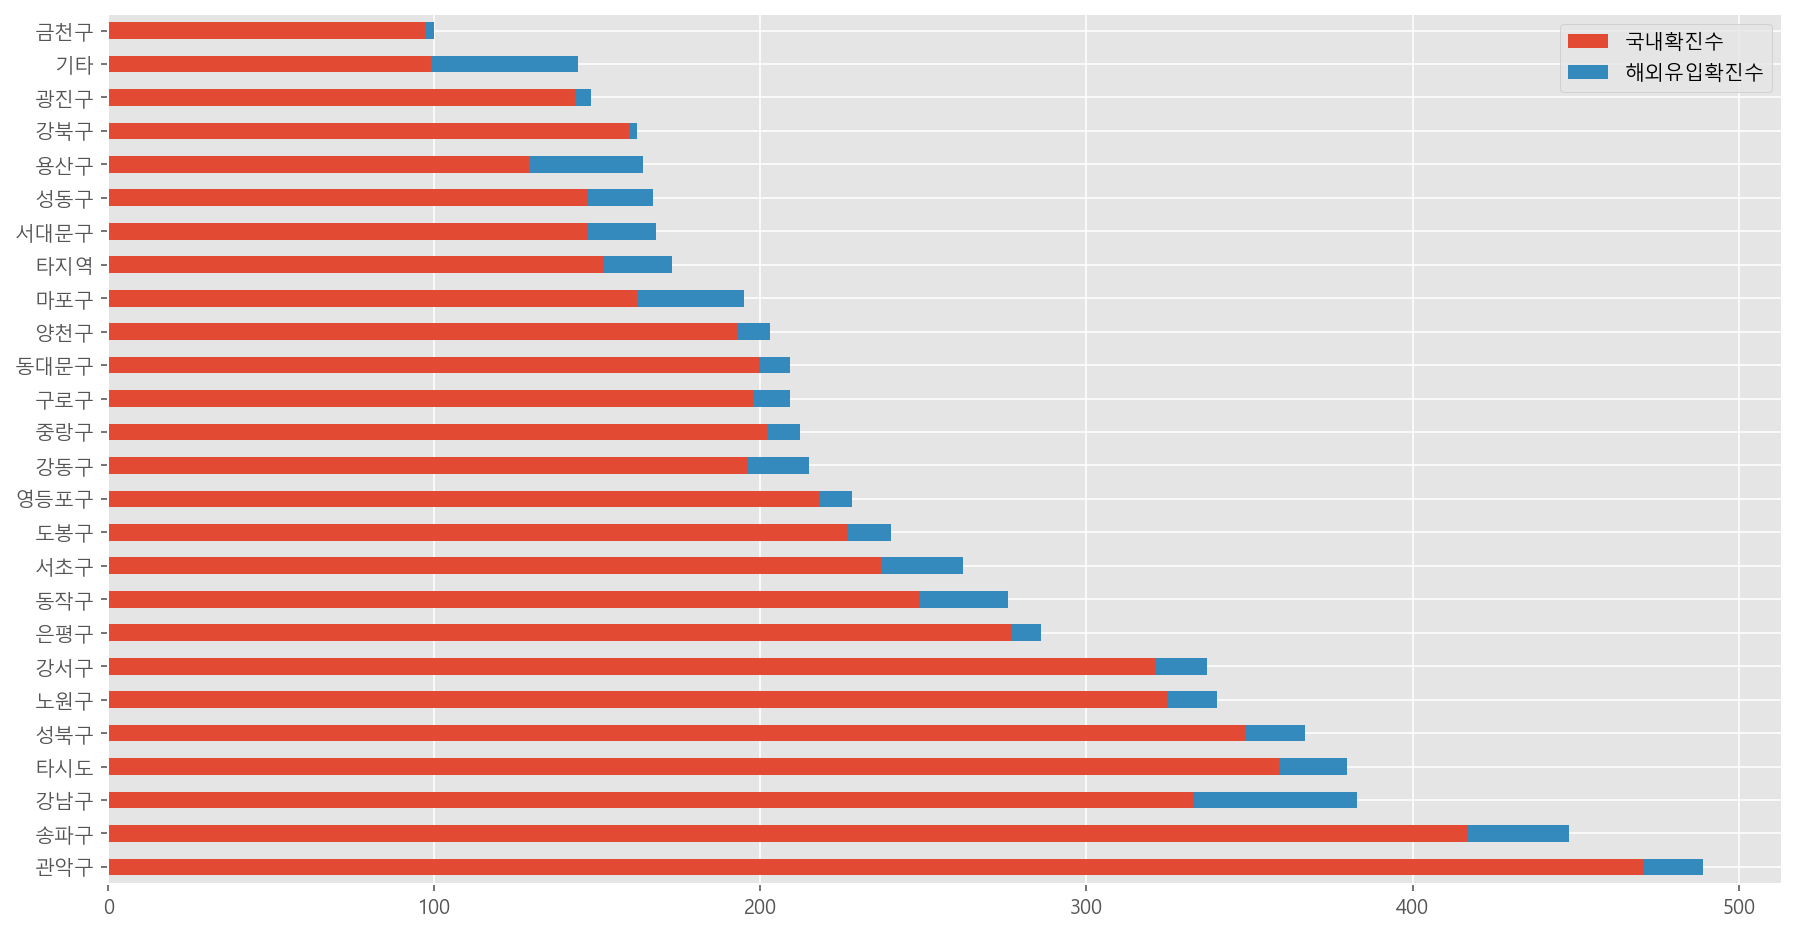

In [113]:
# 국내확진수를 구해서 "국내확진수", "해외유입확진수" 데이터를 쌓아서(stacked) 그려봅니다.
df_all_oversea_case["국내확진수"] = df_all_oversea_case["전체확진수"] - df_all_oversea_case["해외유입확진수"]
df_all_oversea_case[["국내확진수", "해외유입확진수"]].plot.barh(stacked=True, figsize=(15, 8))

In [114]:
# df_all_oversea_case["해외유입비율"] 구하기

df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) * 100
df_all_oversea_case.sort_values(by="해외유입비율", ascending=False).head(10)

,전체확진수,해외유입확진수,국내확진수,해외유입비율
기타,144,45,99,31.250000
용산구,164,35,129,21.341463
마포구,195,33,162,16.923077
강남구,383,50,333,13.054830
서대문구,168,21,147,12.500000
타지역,173,21,152,12.138728
성동구,167,20,147,11.976048
동작구,276,27,249,9.782609
서초구,262,25,237,9.541985
강동구,215,19,196,8.837209


### 해외유입 확진자 중 퇴원 여부

<AxesSubplot:xlabel='지역'>

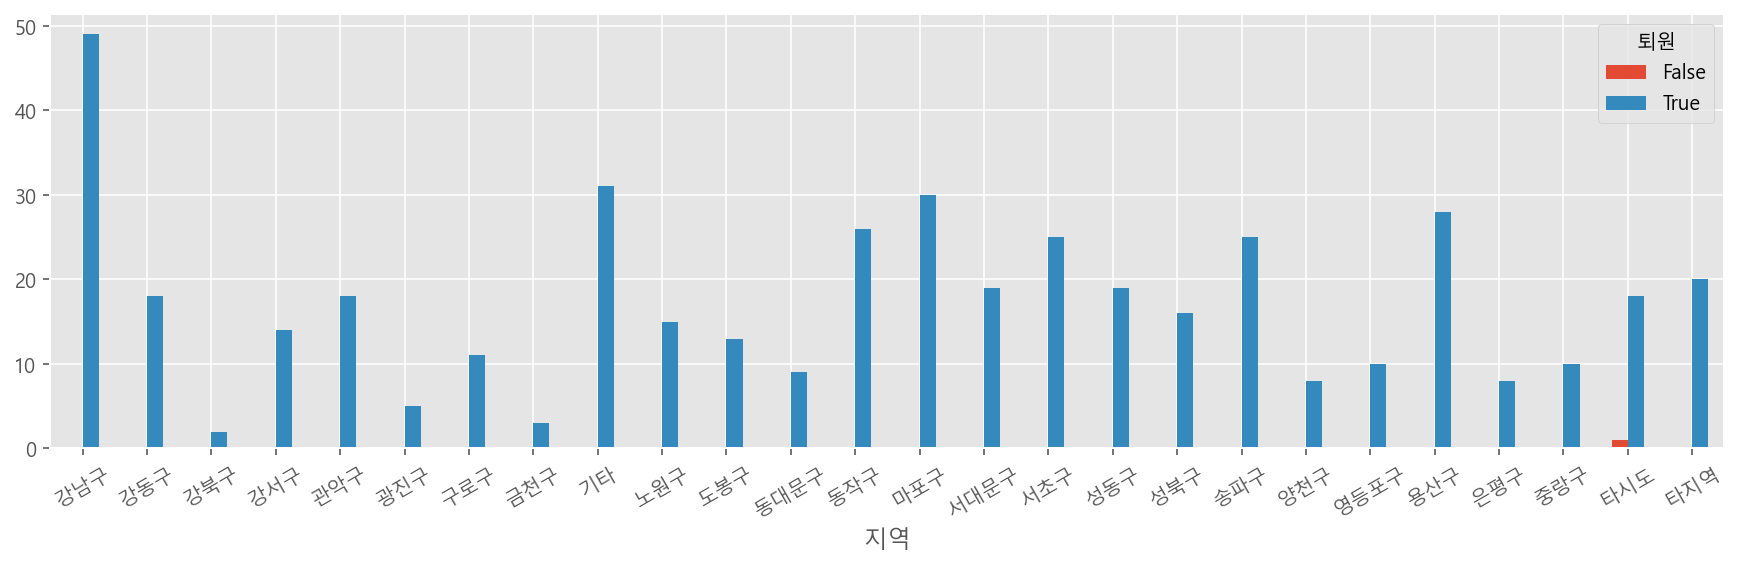

In [115]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기
oversea_finish_count = df_oversea.groupby(["지역", "퇴원"])["연번"].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(figsize=(15, 4), rot=30)

### 월별 해외 확진자 수

<AxesSubplot:>

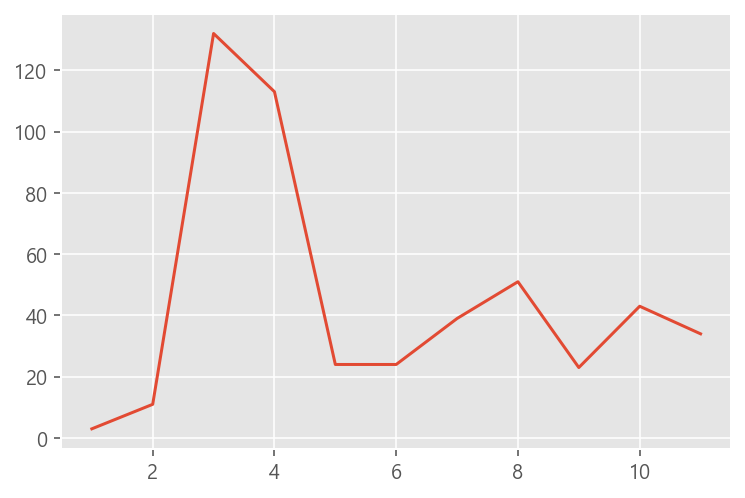

In [116]:
# 월별 해외확진자수 선그래프로 그리기
oversea_monthly_case = df_oversea["월"].value_counts()
oversea_monthly_case.sort_index().plot()

<AxesSubplot:>

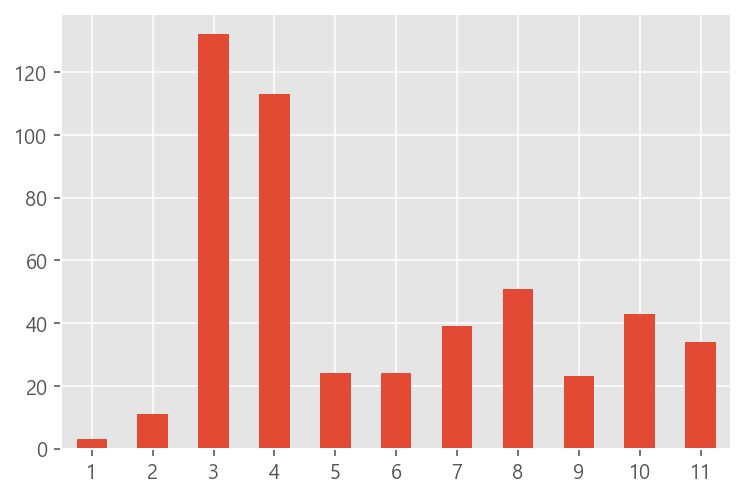

In [117]:
# 월별 해외확진자수 막대그래프로 그리기
oversea_monthly_case.sort_index().plot.bar(rot=0)

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

In [118]:
# 월, 지역 groupby 빈도수를 구하고 .style.background_gradient() 로 수치를 표현해 봅니다.
month_gu = df_oversea.groupby(["월", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중랑구,타시도,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,1
3,21,4,1,3,6,3,9,3,2,3,4,1,12,4,1,10,2,5,9,1,3,6,3,5,6,5
4,16,1,0,2,5,0,0,0,4,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,7,2
5,2,2,1,2,1,0,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,0,0,1
6,0,2,0,0,2,0,1,0,1,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,0,2
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,1,2,4
8,1,0,0,2,2,1,0,0,13,2,3,2,4,2,0,1,0,3,3,1,0,5,1,0,1,4
9,4,1,0,0,0,0,0,0,6,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,1,0


#### crosstab 으로 빈도수 구하기

In [119]:
# 월, 지역 crosstab을 구하고 .style.bar() 로 수치를 표현해 봅니다.

month_gu = pd.crosstab(df_oversea["월"], df_oversea["지역"])
month_gu.style.bar()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중랑구,타시도,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,1
3,21,4,1,3,6,3,9,3,2,3,4,1,12,4,1,10,2,5,9,1,3,6,3,5,6,5
4,16,1,0,2,5,0,0,0,4,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,7,2
5,2,2,1,2,1,0,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,0,0,1
6,0,2,0,0,2,0,1,0,1,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,0,2
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,1,2,4
8,1,0,0,2,2,1,0,0,13,2,3,2,4,2,0,1,0,3,3,1,0,5,1,0,1,4
9,4,1,0,0,0,0,0,0,6,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,1,0


#### pivot_table 로 빈도수 구하기

In [120]:
pd.options.display.max_columns = 30

In [121]:
month_gu = pd.pivot_table(df_oversea, index="월", columns="지역", values="연번", 
               aggfunc="count", fill_value=0)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중랑구,타시도,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,1
3,21,4,1,3,6,3,9,3,2,3,4,1,12,4,1,10,2,5,9,1,3,6,3,5,6,5
4,16,1,0,2,5,0,0,0,4,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,7,2
5,2,2,1,2,1,0,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,0,0,1
6,0,2,0,0,2,0,1,0,1,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,0,2
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,1,2,4
8,1,0,0,2,2,1,0,0,13,2,3,2,4,2,0,1,0,3,3,1,0,5,1,0,1,4
9,4,1,0,0,0,0,0,0,6,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,1,0


### 해외유입이 많은 지역(구)

In [122]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
top_oversea_gu = df_oversea["지역"].value_counts().head().index

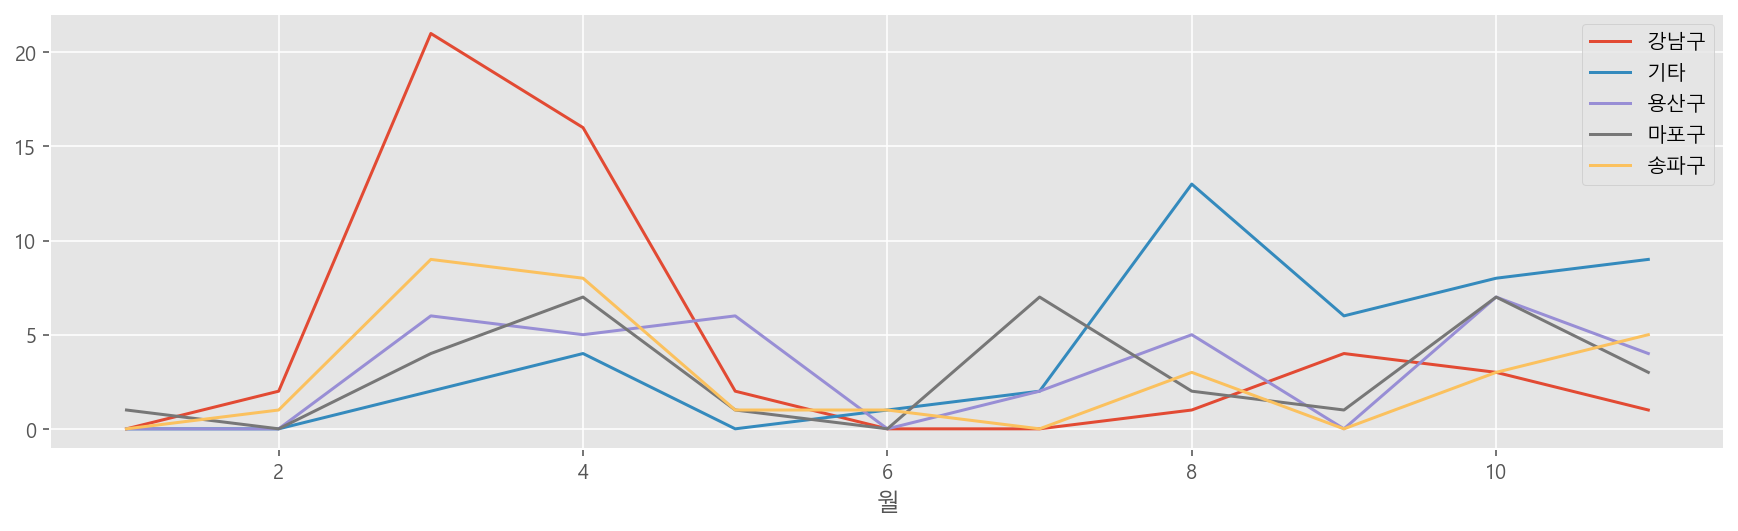

In [123]:
# 시각화 하기
g = month_gu[top_oversea_gu].plot(figsize=(15, 4))
g.legend(loc=1)

* 범례 위치 조정하기 : [matplotlib.pyplot.legend — Matplotlib 3.1.2 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [124]:
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea_gu.fillna(0).astype(int)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중랑구,타시도,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0,0,0,1,0,0
가나,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
남미,4,1,0,0,1,0,0,0,1,1,0,1,1,3,2,0,0,0,2,0,0,2,0,0,3,1
네덜란드,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
네팔,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
러시아,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,2
루마니아,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [125]:
group_oversea_gu = df_oversea.pivot_table(index="해외", columns="지역", values="연번", 
                       aggfunc="count").fillna(0).astype(int)
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중랑구,타시도,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0,0,0,1,0,0
가나,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
남미,4,1,0,0,1,0,0,0,1,1,0,1,1,3,2,0,0,0,2,0,0,2,0,0,3,1
네덜란드,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
네팔,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
러시아,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,2
루마니아,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [126]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?

group_oversea_gu.loc[["미국", "유럽", "남미", "중국"], ["강남구", "서초구", "송파구"]]

지역,강남구,서초구,송파구
해외,,,
미국,30,13,11
유럽,10,9,9
남미,4,0,2
중국,0,0,0


In [127]:
# top_oversea_gu 에 따른 확진수 보기
group_oversea_gu[top_oversea_gu].dropna(how="all").fillna(0).astype(int)

지역,강남구,기타,용산구,마포구,송파구
해외,,,,,
21263,0,0,0,0,0
UAE,0,0,0,0,1
가나,0,0,0,0,0
나이지리아,0,0,0,0,0
남미,4,1,2,3,2
네덜란드,0,0,0,0,0
네팔,0,4,0,0,0
러시아,1,1,0,1,0
루마니아,0,0,0,2,0


### 과제
[코로나(COVID)-19 현황 | 경기도 감염병관리지원단](http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/) 의 코로나 발생현황을 분석해 주세요. 